# BP3511 Preliminary Analysis

In [297]:
# Import modules 
import os 
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
from collections import Counter

In [298]:
# Change the working directory
os.chdir('/Users/chelseajimenez/Desktop/Policy-Language-Analysis/data/BP_AR_3511')

In [299]:
# Board Policy 3511 Template Path 
reference_file_path = "/Users/chelseajimenez/Desktop/Policy-Language-Analysis/3511 CSBA BP - Energy and Water Management Template (2007).txt"
# CSV BP 3511 CLeaned Policy PDFs path 
csv_file_path = "/Users/chelseajimenez/Desktop/Policy-Language-Analysis/cleaned_data/BP3511_cleaned_policy_pdfs.csv"

In [300]:
# Use pandas to read CSV file 
data = pd.read_csv(csv_file_path)
with open(reference_file_path, 'r') as ref_file:
    reference_text = ref_file.read()
extracted_text_column = "BP3511: PDF Text"
# Clean data and drop NaN values 
data = data.dropna(subset=[extracted_text_column])

###  Use Cosine Similarity to Compare School District Board Policy to Board Policy Template 

In [301]:
# Prepare text data for TF-IDF vectorization
texts = data[extracted_text_column].fillna("").tolist()  # Handle missing values
texts.insert(0, reference_text)  # Add the reference text as the first entry

# Compute TF-IDF and cosine similarity
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(texts)
cosine_similarities = cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:]).flatten()

# Add similarity scores to the DataFrame
data['similarity_score'] = cosine_similarities

# Add a column to display the reference text alongside
data['reference_text'] = reference_text

# Select relevant columns for display
comparison_results = data[[extracted_text_column, 'reference_text', 'similarity_score']].sort_values(by='similarity_score', ascending=False)

# Display the results
comparison_results

,BP3511: PDF Text,reference_text,similarity_score
613,book policy manual section 3000 business nonin...,﻿CSBA Sample - BP 3511\n\n\nBoard Policy \nBus...,0.144646
300,business noninstructional operation bp 3511 en...,﻿CSBA Sample - BP 3511\n\n\nBoard Policy \nBus...,0.124914
619,policy 3511 energy water management status ado...,﻿CSBA Sample - BP 3511\n\n\nBoard Policy \nBus...,0.123570
515,business noninstructional operation bp 3511 en...,﻿CSBA Sample - BP 3511\n\n\nBoard Policy \nBus...,0.123027
50,business noninstructional operation bp 3511 en...,﻿CSBA Sample - BP 3511\n\n\nBoard Policy \nBus...,0.122559
...,...,...,...
334,policy 3511 energy water management status ado...,﻿CSBA Sample - BP 3511\n\n\nBoard Policy \nBus...,0.014627
165,w n e u n f e c h l r c administrative service...,﻿CSBA Sample - BP 3511\n\n\nBoard Policy \nBus...,0.013389
293,book policy manual section 3000 business servi...,﻿CSBA Sample - BP 3511\n\n\nBoard Policy \nBus...,0.012205
594,policy 3511 energy water management status ado...,﻿CSBA Sample - BP 3511\n\n\nBoard Policy \nBus...,0.012034


In [302]:
# Middle of histogram is .06-.07
similarity_threshold = 0.06

# Count the number of board policies with similarity scores above the threshold
most_similar_policies_count = (data['similarity_score'] >= similarity_threshold).sum()

# Display count
print(f"Number of board policies most similar to the reference policy: {most_similar_policies_count}")

Number of board policies most similar to the reference policy: 456


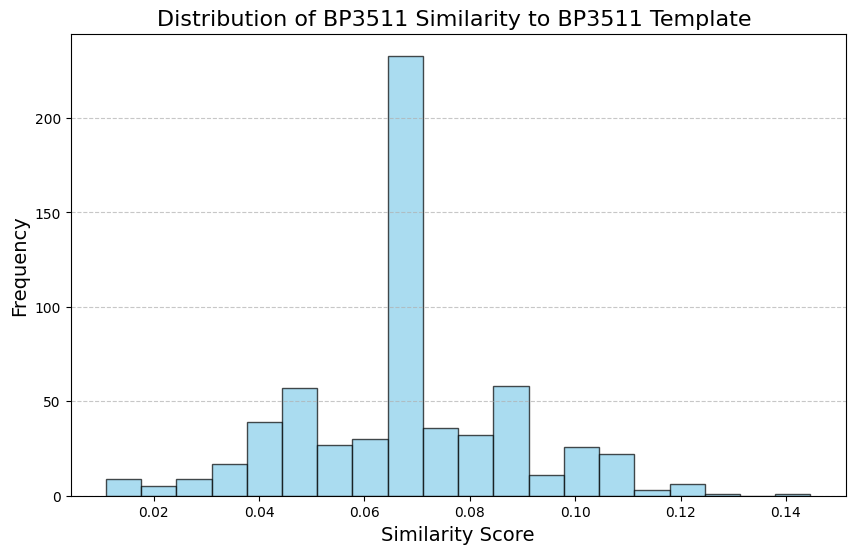

In [303]:
# Plot histogram of similarity scores
plt.figure(figsize=(10, 6))
plt.hist(data['similarity_score'], bins=20, color ='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribution of BP3511 Similarity to BP3511 Template ', fontsize=16)
plt.xlabel('Similarity Score', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Compare cosine similarity scores to overall score- does greater similarity to BP template equal higher commitment score? 

In [409]:
# Compare similarity scores with School Board Policy Commitments Score 
data[["School Board Policy Commitments Score (out of 3)", "similarity_score"]]

#Sort data from highest to lowest commitments score
sort_data = data.sort_values(by= "similarity_score", ascending = False)
sort_data[["District Name", "School Board Policy Commitments Score (out of 3)", "similarity_score"]]

,District Name,School Board Policy Commitments Score (out of 3),similarity_score
613,Conejo Valley Unified,3.0,0.144646
300,Placer Hills Union Elementary,3.0,0.124914
619,Washington Unified,3.0,0.123570
515,Vacaville Unified,3.0,0.123027
50,Black Oak Mine Unified,3.0,0.122559
...,...,...,...
421,Paso Robles Joint Unified,3.0,0.015676
334,San Juan Unified,3.0,0.014627
165,Downey Unified,0.5,0.013389
293,Tustin Unified,0.5,0.012205


### Distribution of School Board Policy Commitment Scores Across School Districts

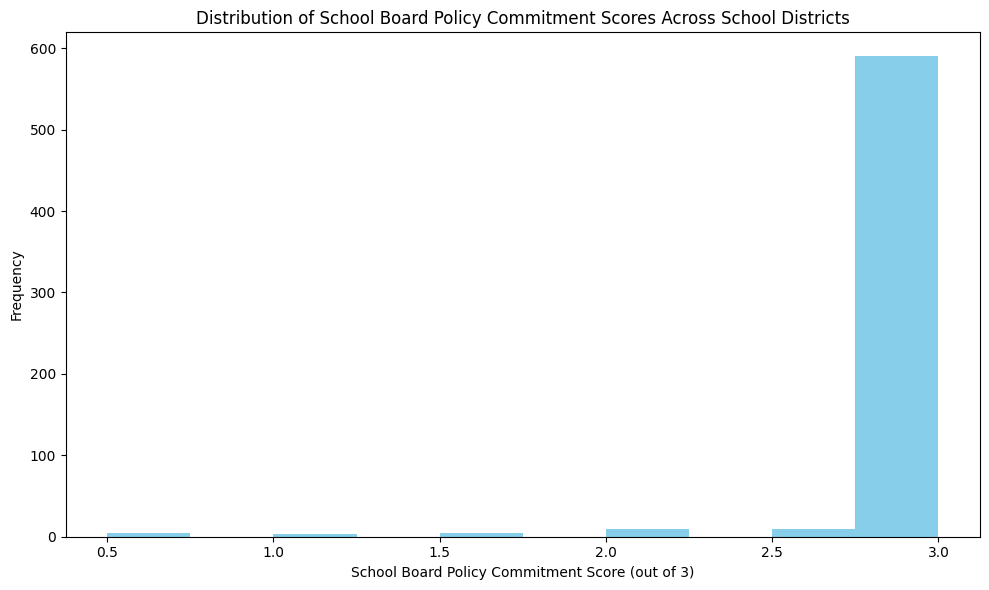

In [305]:
# Distribution of School Board Policy Commitment Scores Across School Districts
plt.figure(figsize=(10,6))
plt.hist(data["School Board Policy Commitments Score (out of 3)"], bins=10, color='skyblue')
plt.xlabel('School Board Policy Commitment Score (out of 3)')
plt.ylabel('Frequency')
plt.title('Distribution of School Board Policy Commitment Scores Across School Districts')
plt.tight_layout()
plt.show()

### Low Commitment School Districts vs Similarity Scores Against Template

In [306]:
# Dataframe for low commitment score vs similarity score to template
low_commitment_score = 1.5 
low_commitment_data = data[data["School Board Policy Commitments Score (out of 3)"] <= low_commitment_score]
low_commitment_df = low_commitment_data[["District Name", "School Board Policy Commitments Score (out of 3)", "similarity_score"]]
low_commitment_df

,District Name,School Board Policy Commitments Score (out of 3),similarity_score
78,Cutten Elementary,1.0,0.083570
165,Downey Unified,0.5,0.013389
200,Whittier Union High,1.5,0.053319
281,Fullerton Elementary,1.0,0.038151
283,Huntington Beach Union High,0.5,0.010939
290,Placentia-Yorba Linda Unified,1.5,0.038278
293,Tustin Unified,0.5,0.012205
370,Cajon Valley Union,1.5,0.049496
419,Shandon Joint Unified,1.0,0.106316
459,Cambrian,0.5,0.030142


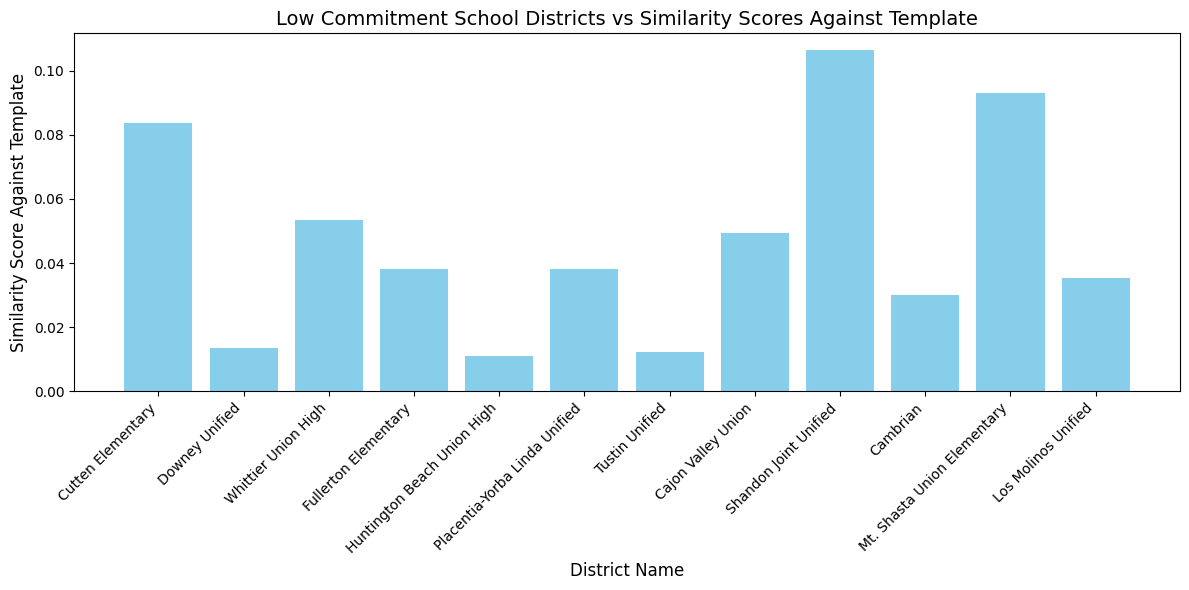

In [307]:
# Bar chart for low commitment school districts 
plt.figure(figsize=(12,6))
plt.bar(low_commitment_df['District Name'], low_commitment_df['similarity_score'], color= 'skyblue')
plt.xlabel('District Name', fontsize=12)
plt.ylabel('Similarity Score Against Template', fontsize=12)
plt.title("Low Commitment School Districts vs Similarity Scores Against Template", fontsize =14)
plt.xticks(rotation = 45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

In [308]:
# Dataframe for high commitment score vs similarity score to template
high_commitment_score = 1.5
high_commitment_data = data[data["School Board Policy Commitments Score (out of 3)"] > high_commitment_score]
high_commitment_df = high_commitment_data[["District Name", "School Board Policy Commitments Score (out of 3)", "similarity_score"]]
high_commitment_df

,District Name,School Board Policy Commitments Score (out of 3),similarity_score
0,Alameda Unified,3.0,0.065205
1,Albany City Unified,3.0,0.046619
2,Castro Valley Unified,3.0,0.108792
3,Hayward Unified,3.0,0.042800
4,Newark Unified,3.0,0.047801
...,...,...,...
620,Winters Joint Unified,3.0,0.107838
621,Woodland Joint Unified,3.0,0.042932
622,Marysville Joint Unified,3.0,0.085963
623,Plumas Lake Elementary,3.0,0.086591


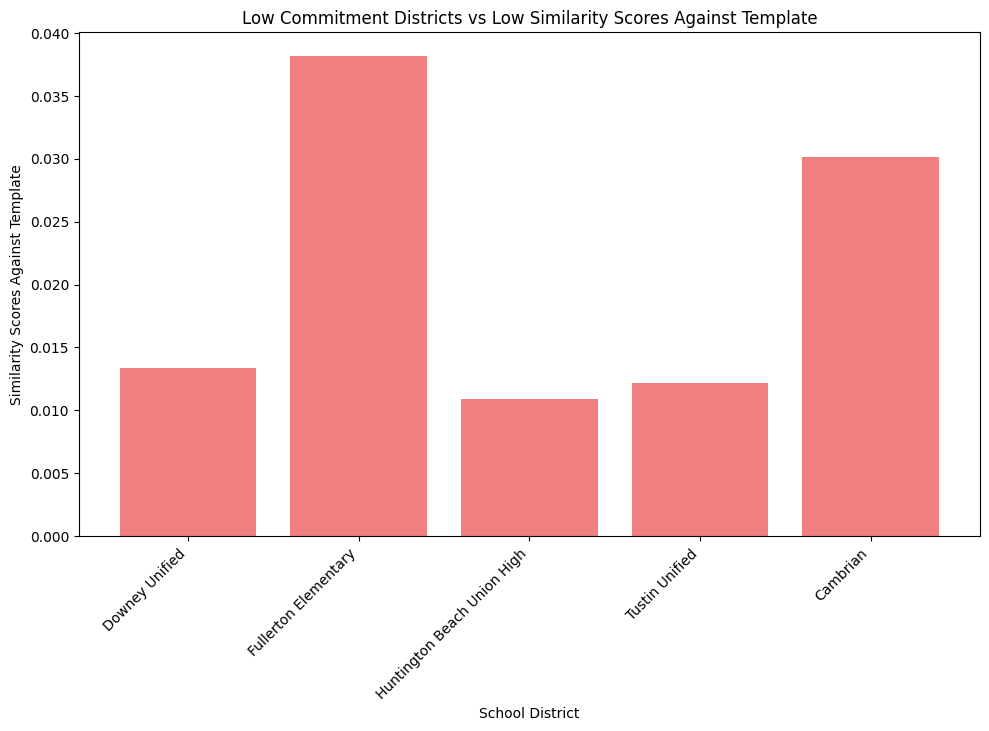

In [310]:
# Plot low commitment districts versus low similarity scores 
low_commitment_threshold = 1.5
low_similarity_threshold = .04
data = data.dropna(subset=["School Board Policy Commitments Score (out of 3)", "similarity_score"])
high_commitment_low_similarity = data[(data["School Board Policy Commitments Score (out of 3)"] < low_commitment_threshold) & (data["similarity_score"] < low_similarity_threshold)]
filtered_df = high_commitment_low_similarity[['District Name', "School Board Policy Commitments Score (out of 3)", 'similarity_score']]
plt.figure(figsize=(10,6))
plt.bar(filtered_df['District Name'], filtered_df['similarity_score'], color='lightcoral')
plt.title("Low Commitment Districts vs Low Similarity Scores Against Template")
plt.xlabel("School District")
plt.ylabel("Similarity Scores Against Template")
plt.tight_layout()
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.show()

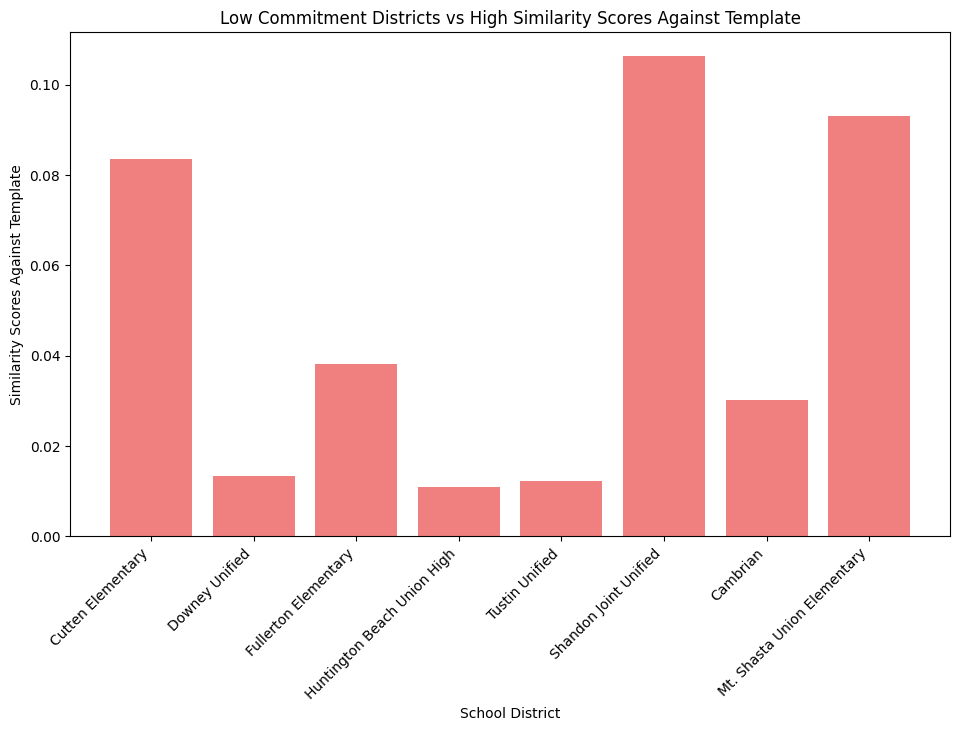

In [311]:
# plot low commitment districts versus high similarity scores 
low_commitment_threshold = 1.5
high_similarity_threshold = .12
data = data.dropna(subset=["School Board Policy Commitments Score (out of 3)", "similarity_score"])
high_commitment_low_similarity = data[(data["School Board Policy Commitments Score (out of 3)"] < low_commitment_threshold) & (data["similarity_score"] < high_similarity_threshold)]
filtered_df = high_commitment_low_similarity[['District Name', "School Board Policy Commitments Score (out of 3)", 'similarity_score']]
plt.figure(figsize=(10,6))
plt.bar(filtered_df['District Name'], filtered_df['similarity_score'], color='lightcoral')
plt.title("Low Commitment Districts vs High Similarity Scores Against Template")
plt.xlabel("School District")
plt.ylabel("Similarity Scores Against Template")
plt.tight_layout()
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.show()

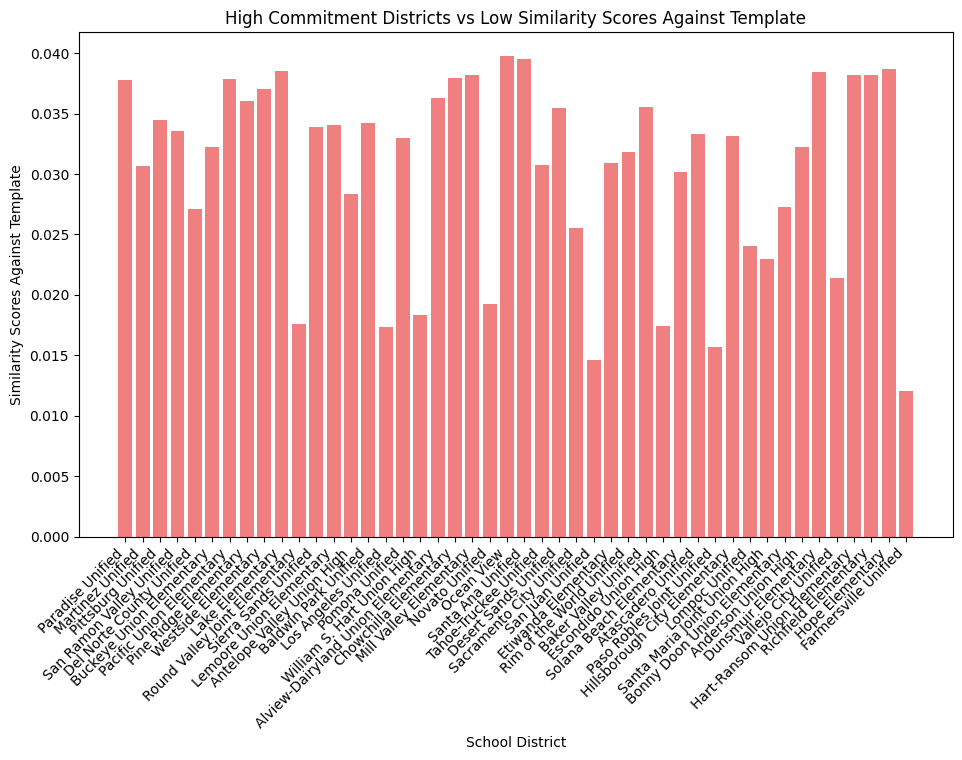

In [312]:
# plot high commitment districts versus low similarity scores - makes me think they care more bc its unique 
high_commitment_threshold = 1.5
low_similarity_threshold = .04
data = data.dropna(subset=["School Board Policy Commitments Score (out of 3)", "similarity_score"])
high_commitment_low_similarity = data[(data["School Board Policy Commitments Score (out of 3)"] > high_commitment_threshold) & (data["similarity_score"] < low_similarity_threshold)]
filtered_df = high_commitment_low_similarity[['District Name', "School Board Policy Commitments Score (out of 3)", 'similarity_score']]
plt.figure(figsize=(10,6))
plt.bar(filtered_df['District Name'], filtered_df['similarity_score'], color='lightcoral')
plt.title("High Commitment Districts vs Low Similarity Scores Against Template")
plt.xlabel("School District")
plt.ylabel("Similarity Scores Against Template")
plt.tight_layout()
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.show()

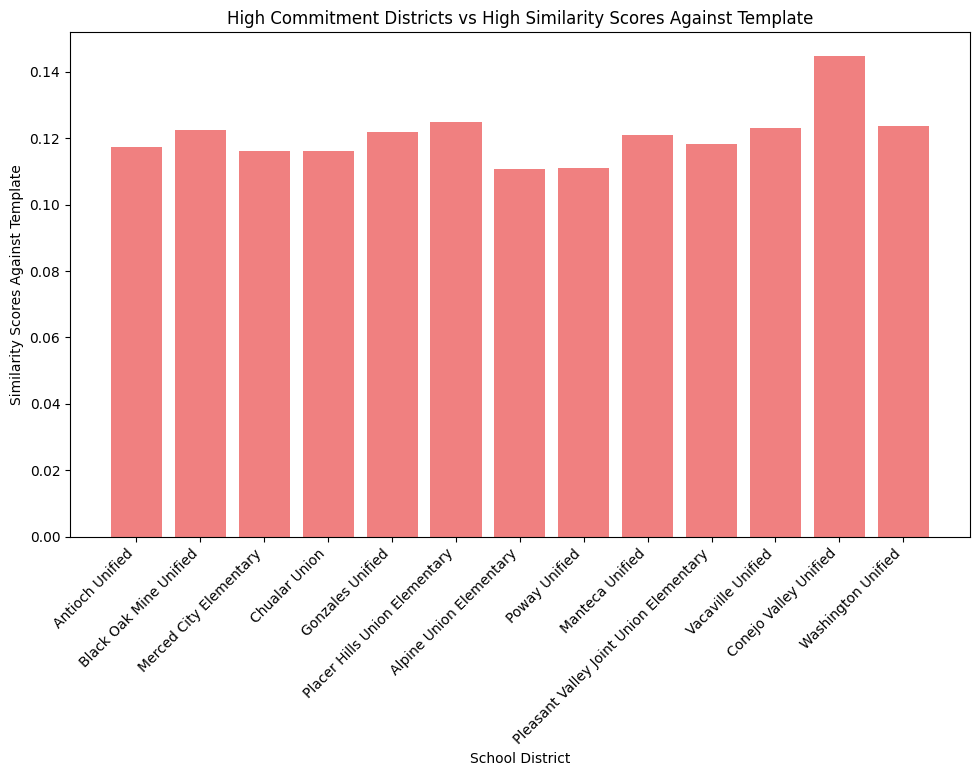

In [313]:
# plot high commitment districts versus high similarity scores 
high_commitment_threshold = 1.5
high_similarity_threshold = .11
data = data.dropna(subset=["School Board Policy Commitments Score (out of 3)", "similarity_score"])
high_commitment_low_similarity = data[(data["School Board Policy Commitments Score (out of 3)"] > high_commitment_threshold) & (data["similarity_score"] > high_similarity_threshold)]
filtered_df = high_commitment_low_similarity[['District Name', "School Board Policy Commitments Score (out of 3)", 'similarity_score']]
plt.figure(figsize=(10,6))
plt.bar(filtered_df['District Name'], filtered_df['similarity_score'], color='lightcoral')
plt.title("High Commitment Districts vs High Similarity Scores Against Template")
plt.xlabel("School District")
plt.ylabel("Similarity Scores Against Template")
plt.tight_layout()
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.show()

### Average School Board Policy Commitments Score by Student Enrollment Range

In [314]:
# Ensure 'Student Enrollment' and 'Commitment Score' are numeric and drop invalid rows
data['2023-24 Student Enrollment'] = pd.to_numeric(data['2023-24 Student Enrollment'], errors='coerce')
data['School Board Policy Commitments Score (out of 3)'] = pd.to_numeric(data['School Board Policy Commitments Score (out of 3)'], errors='coerce')
data = data.dropna(subset=['2023-24 Student Enrollment', 'School Board Policy Commitments Score (out of 3)'])

Average School Board Policy Commitments Score by Student Enrollment Range:
Enrollment Range
0-500         2.946903
501-1000      2.857143
1001-5000     2.965665
5001-10000    2.989247
10000+        2.870079
Name: School Board Policy Commitments Score (out of 3), dtype: float64


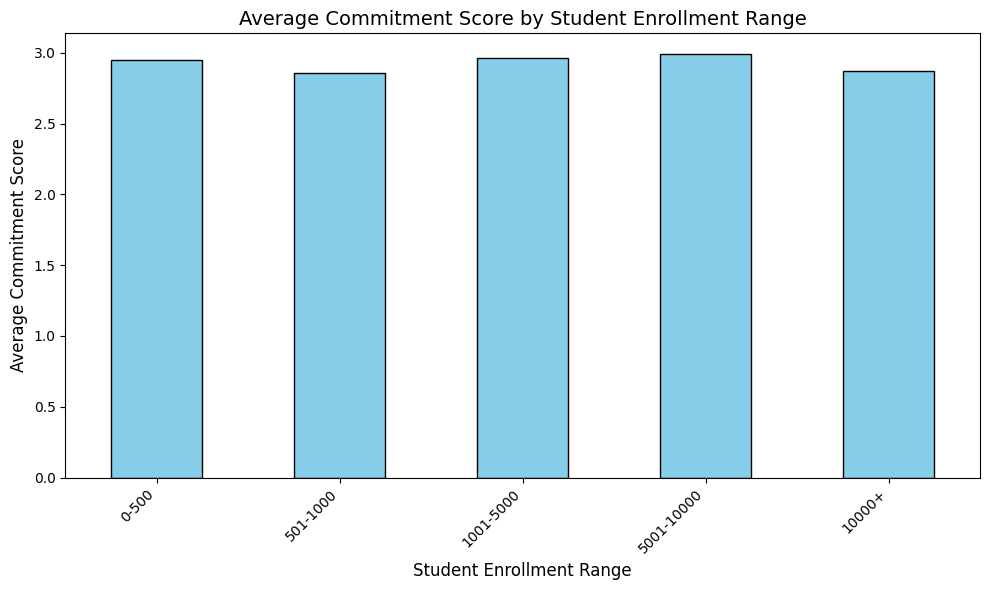

In [315]:
# Create bins for student enrollment ranges
bins = [0, 500, 1000, 5000, 10000, float('inf')]  # Define ranges
labels = ['0-500', '501-1000', '1001-5000', '5001-10000', '10000+']
data['Enrollment Range'] = pd.cut(data['2023-24 Student Enrollment'], bins=bins, labels=labels)

# Calculate average commitment score by enrollment range
grouped_data = data.groupby('Enrollment Range', observed=True)['School Board Policy Commitments Score (out of 3)'].mean()

# Display results
print("Average School Board Policy Commitments Score by Student Enrollment Range:")
print(grouped_data)

# Bar plot for grouped data
grouped_data.plot(kind='bar', color='skyblue', edgecolor='black', figsize=(10, 6))
plt.xlabel('Student Enrollment Range', fontsize=12)
plt.ylabel('Average Commitment Score', fontsize=12)
plt.title('Average Commitment Score by Student Enrollment Range', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()

### Do newer updated policies align more with template and have a higher score or do old policies align less with template and have a lower score?

In [316]:
# Updated policies 
policy_updated = 'BP 3511 Year of Policy Update if applicable' 
year_threshold = 2020
data[policy_updated]=pd.to_numeric(data[policy_updated], errors='coerce')
data = data.dropna(subset=[policy_updated])
recent_policies = data[data[policy_updated] > year_threshold]
recent_policies[[policy_updated]]
# print(recent_policies[[policy_updated]])

,BP 3511 Year of Policy Update if applicable
9,2022.0
19,2021.0
31,2022.0
32,2023.0
34,2022.0
...,...
560,2022.0
577,2022.0
606,2022.0
611,2023.0


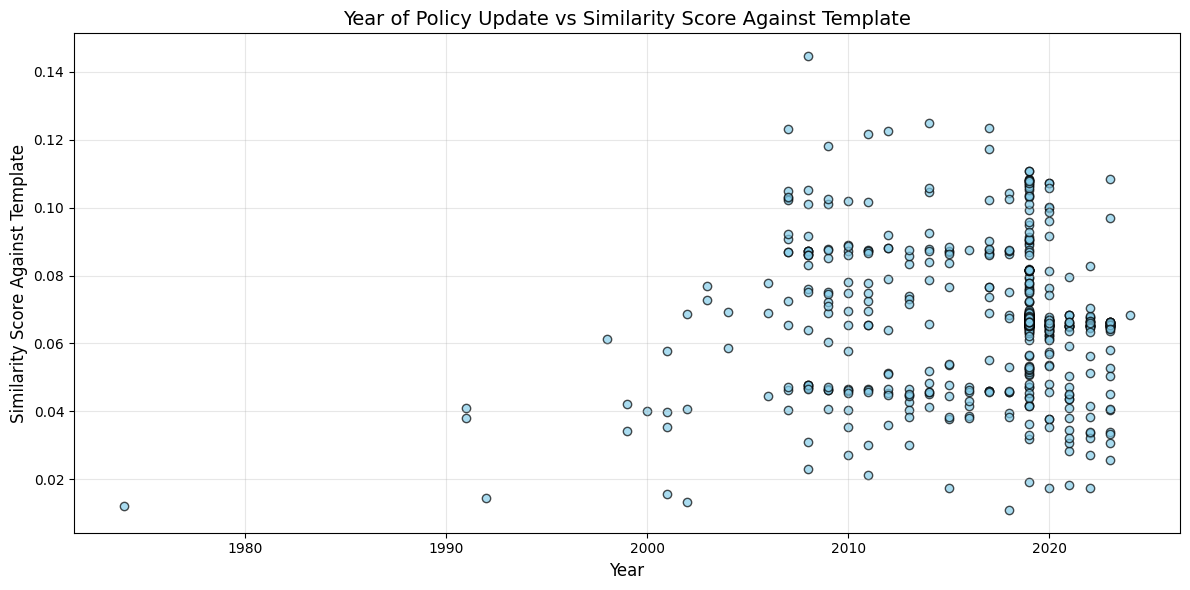

In [317]:
# Scatter plot: Update Year vs Similarity Score
plt.figure(figsize=(12, 6))
plt.scatter(data[policy_updated], data['similarity_score'], color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Similarity Score Against Template', fontsize=12)
plt.title('Year of Policy Update vs Similarity Score Against Template', fontsize=14)
plt.grid(alpha=0.3)
plt.tight_layout()

# Show the plot
plt.show()

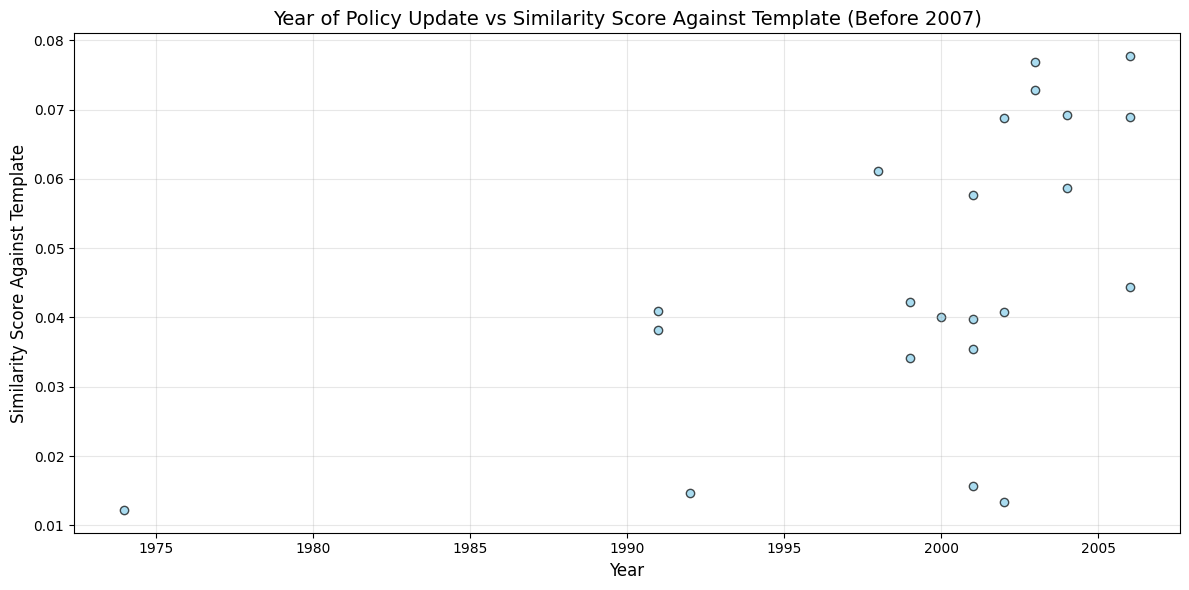

In [318]:
# Filter data for policies updated before 2007
filtered_data = data[data[policy_updated] < 2007]

# Scatter plot: Update Year vs Similarity Score
plt.figure(figsize=(12, 6))
plt.scatter(filtered_data[policy_updated], filtered_data['similarity_score'], color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Similarity Score Against Template', fontsize=12)
plt.title('Year of Policy Update vs Similarity Score Against Template (Before 2007)', fontsize=14)
plt.grid(alpha=0.3)
plt.tight_layout()

# Show the plot
plt.show()

In [319]:
# Filter data for policies updated before 2007
filtered_data = data[data[policy_updated] < 2007]

# Calculate the average commitment score
average_commitment_score = filtered_data['School Board Policy Commitments Score (out of 3)'].mean()

# Display the result
print(f"The average commitment score for policies updated before 2007 is: {average_commitment_score:.2f}")

The average commitment score for policies updated before 2007 is: 2.57


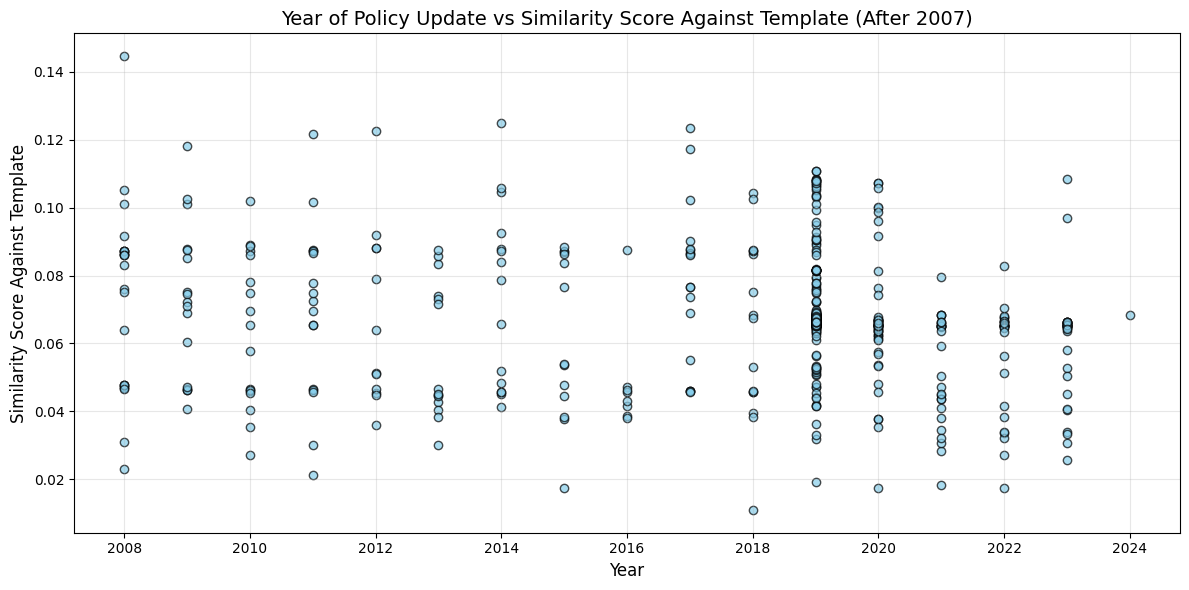

In [320]:
# Filter data for policies updated after 2007
filtered_data = data[data[policy_updated] > 2007]

# Scatter plot: Update Year vs Similarity Score
plt.figure(figsize=(12, 6))
plt.scatter(filtered_data[policy_updated], filtered_data['similarity_score'], color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Similarity Score Against Template', fontsize=12)
plt.title('Year of Policy Update vs Similarity Score Against Template (After 2007)', fontsize=14)
plt.grid(alpha=0.3)
plt.tight_layout()

# Show the plot
plt.show()


In [321]:
# Filter data for policies updated before 2007
filtered_data = data[data[policy_updated] > 2007]

# Calculate the average commitment score
average_commitment_score = filtered_data['School Board Policy Commitments Score (out of 3)'].mean()

# Display the result
print(f"The average commitment score for policies updated after 2007 is: {average_commitment_score:.2f}")

The average commitment score for policies updated after 2007 is: 2.95


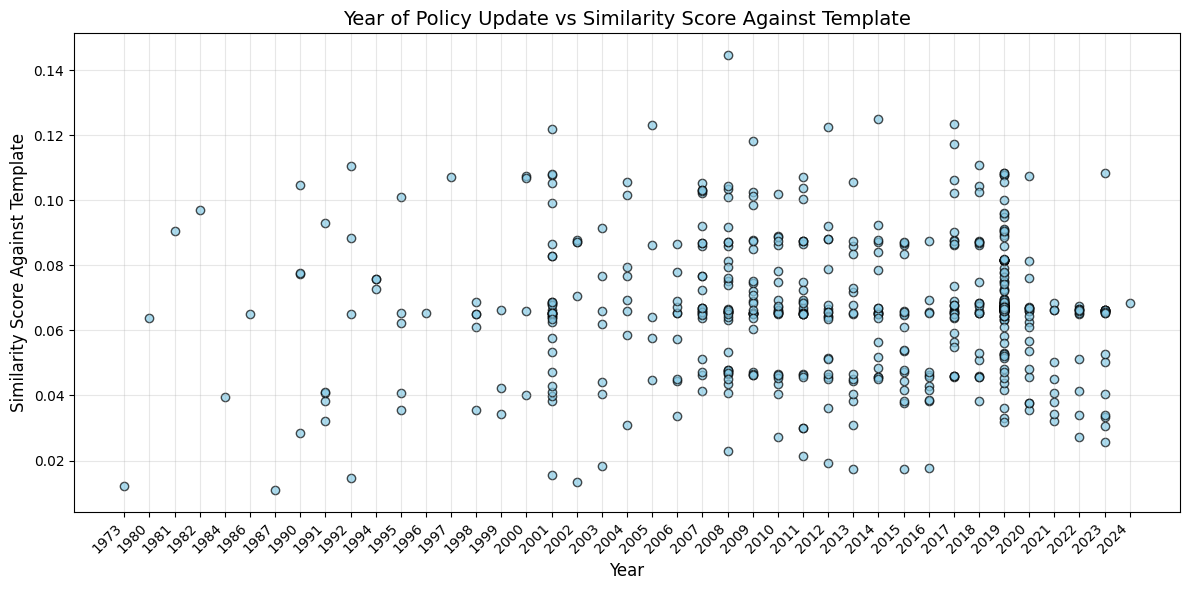

In [322]:
# Scatter plot: Update Year vs Similarity Score
policy_adopted = 'BP 3511 Year Adopted' 
data = data.sort_values(by=policy_adopted)
plt.figure(figsize=(12, 6))
plt.scatter(data[policy_adopted], data['similarity_score'], color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Similarity Score Against Template', fontsize=12)
plt.title('Year of Policy Update vs Similarity Score Against Template', fontsize=14)
plt.grid(alpha=0.3)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()

### Word Count within Board Policies 

In [323]:
# Function to calculate word count
def word_count(text):
    if pd.notnull(text):  # Check for non-null values
        return len(str(text).split())  # Split text into words and count
    return 0  # Return 0 for missing or invalid text

# Add a word count column
data['word_count'] = data[extracted_text_column].apply(word_count)

# Display the word count for each row with dynamic row numbers
print("Word Counts for Extracted Texts:\n")
for index, row in data.iterrows():
    extracted_text = row[extracted_text_column]
    word_count_value = row['word_count']
    print(f"Row {index + 1} Word Count: {word_count_value}")

Word Counts for Extracted Texts:

Row 294 Word Count: 111
Row 52 Word Count: 595
Row 260 Word Count: 678
Row 339 Word Count: 462
Row 292 Word Count: 305
Row 315 Word Count: 342
Row 284 Word Count: 90
Row 152 Word Count: 157
Row 293 Word Count: 393
Row 45 Word Count: 289
Row 337 Word Count: 287
Row 42 Word Count: 113
Row 282 Word Count: 249
Row 508 Word Count: 705
Row 65 Word Count: 128
Row 199 Word Count: 132
Row 226 Word Count: 343
Row 370 Word Count: 682
Row 335 Word Count: 83
Row 171 Word Count: 323
Row 86 Word Count: 350
Row 396 Word Count: 350
Row 54 Word Count: 284
Row 287 Word Count: 340
Row 567 Word Count: 148
Row 514 Word Count: 361
Row 348 Word Count: 671
Row 358 Word Count: 172
Row 319 Word Count: 343
Row 593 Word Count: 693
Row 313 Word Count: 283
Row 365 Word Count: 264
Row 462 Word Count: 329
Row 461 Word Count: 329
Row 165 Word Count: 159
Row 359 Word Count: 343
Row 151 Word Count: 141
Row 154 Word Count: 109
Row 61 Word Count: 593
Row 186 Word Count: 114
Row 20 Word Cou

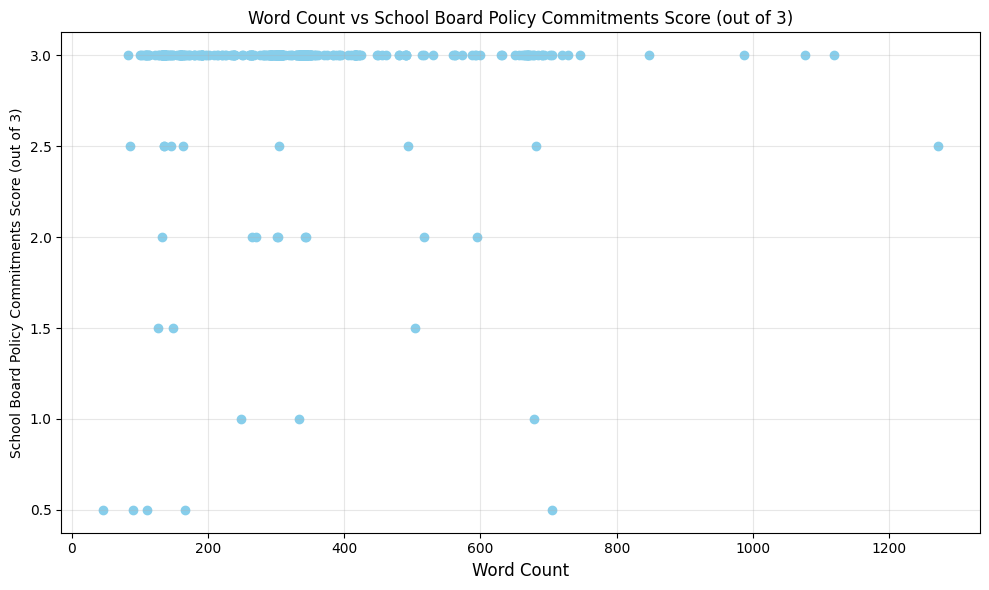

In [324]:
# Plot for word count and commitment score
plt.figure(figsize=(10,6))
plt.scatter(data['word_count'], data['School Board Policy Commitments Score (out of 3)'], color='skyblue')
plt.xlabel('Word Count', fontsize=12)
plt.grid(alpha=0.3)
plt.xlabel('Word Count')
plt.ylabel('School Board Policy Commitments Score (out of 3)')
plt.title("Word Count vs School Board Policy Commitments Score (out of 3)")
plt.tight_layout()

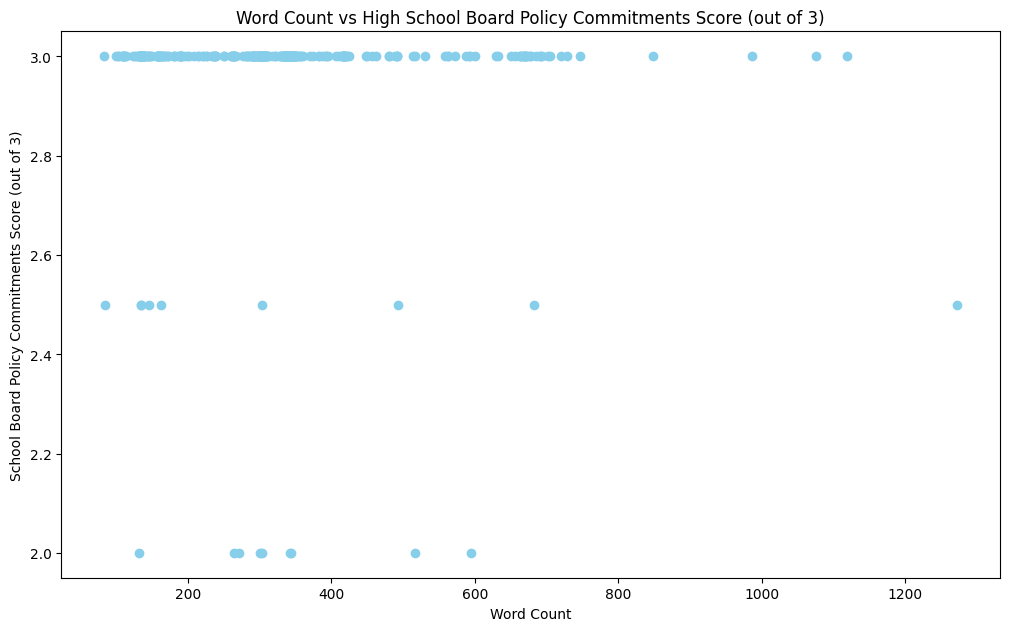

In [325]:
# plot word count and high commitment scores- do higher scores means there is a higher word count? 
high_commitment_data = data[data['School Board Policy Commitments Score (out of 3)'] > 1.5]
plt.figure(figsize=(10,6))
plt.scatter(high_commitment_data['word_count'], high_commitment_data['School Board Policy Commitments Score (out of 3)'], color ='skyblue')
plt.tight_layout()
plt.xlabel('Word Count')
plt.title("Word Count vs High School Board Policy Commitments Score (out of 3)")
plt.ylabel('School Board Policy Commitments Score (out of 3)')
plt.show()

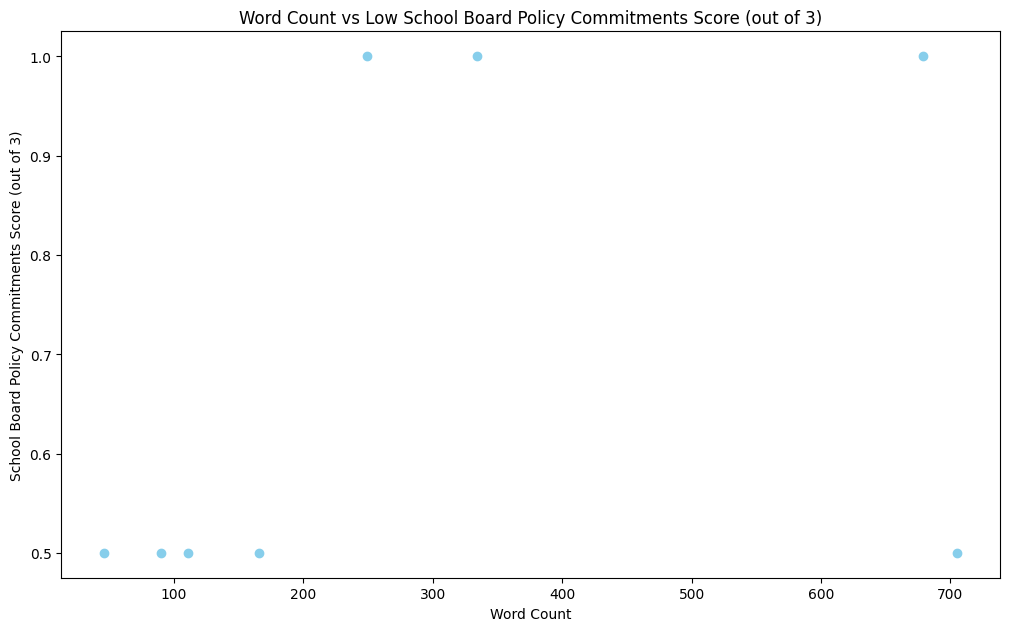

In [326]:
# Plot word count and low commitment scores- do higher scores means there is a higher word count? 
high_commitment_data = data[data['School Board Policy Commitments Score (out of 3)'] < 1.5]
plt.figure(figsize=(10,6))
plt.scatter(high_commitment_data['word_count'], high_commitment_data['School Board Policy Commitments Score (out of 3)'], color ='skyblue')
plt.tight_layout()
plt.xlabel('Word Count')
plt.title("Word Count vs Low School Board Policy Commitments Score (out of 3)")
plt.ylabel('School Board Policy Commitments Score (out of 3)')
plt.show()

In [327]:
# Find average word count for commitment scores of 3 
commitment_score_three = data[data['School Board Policy Commitments Score (out of 3)'] == 3]
average_word_count = commitment_score_three['word_count'].mean()
print(f"The average word count for School Board Policy Commitment Scores of 3 is: {average_word_count:.2f}")

The average word count for School Board Policy Commitment Scores of 3 is: 321.42


In [328]:
# Find average word count for commitment scores below 1.5 
commitment_score_three = data[data['School Board Policy Commitments Score (out of 3)'] < 1.5]
average_word_count = commitment_score_three['word_count'].mean()
print(f"The average word count for School Board Policy Commitment Scores below 1.5 is: {average_word_count:.2f}")

The average word count for School Board Policy Commitment Scores below 1.5 is: 297.50


### Average School Board Policy Commitments Score by Word Count Range

In [329]:
# Create word count bins
data['Word Count Range'] = pd.cut(data['word_count'], bins=[0, 100, 200, 300, 400, float('inf')], 
                                  labels=['0-100', '101-200', '201-300', '301-400', '400+'])

# Calculate average commitment score for each range
avg_score_by_range = data.groupby('Word Count Range', observed= True)['School Board Policy Commitments Score (out of 3)'].mean()

# Print the result
print("Average Commitment Score by Word Count Range:")
print(avg_score_by_range)

Average Commitment Score by Word Count Range:
Word Count Range
0-100      1.900000
101-200    2.905172
201-300    2.931034
301-400    2.979495
400+       2.876623
Name: School Board Policy Commitments Score (out of 3), dtype: float64


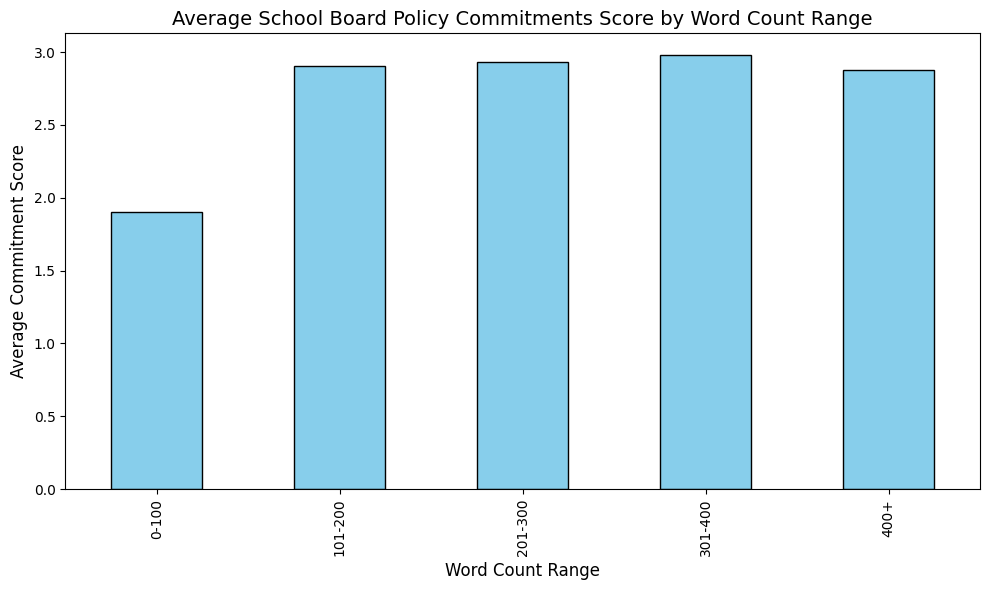

In [330]:
# Bar plot for grouped data
avg_score_by_range.plot(kind='bar', color='skyblue', edgecolor='black', figsize=(10, 6))
plt.xlabel('Word Count Range', fontsize=12)
plt.ylabel('Average Commitment Score', fontsize=12)
plt.title('Average School Board Policy Commitments Score by Word Count Range', fontsize=14)
plt.tight_layout()

# Show the plot
plt.show()

### Word Frequency within Board Policies 

In [331]:
# Calculate word frequency 
def word_frequency(text):
    if pd.notnull(text):
        words = str(text).lower().split()
        return Counter(words)
    return Counter()
extracted_text_column = "BP3511: PDF Text"
data['word_frequency'] = data[extracted_text_column].apply(word_frequency)

for index, row in data.iterrows():
    print(f"Row {index + 1} Word Frequency:")
    filtered_words = {word: count for word, count in row['word_frequency'].items() if count > 6 and word != 'cf'}
    print(filtered_words)
    print("-" * 80)

Row 294 Word Frequency:
{}
--------------------------------------------------------------------------------
Row 52 Word Frequency:
{'board': 9, 'district': 23, 'conservation': 9, 'energy': 30, 'water': 26, 'program': 11, 'management': 10, 'shall': 10, 'code': 8}
--------------------------------------------------------------------------------
Row 260 Word Frequency:
{'school': 12, 'district': 16, 'energy': 11, 'water': 21, 'management': 16, 'resource': 10, 'goal': 7, 'superintendent': 9, 'designee': 9, 'shall': 12, 'plan': 7, 'code': 8, 'california': 7, 'http': 11}
--------------------------------------------------------------------------------
Row 339 Word Frequency:
{'energy': 9, 'water': 15, 'management': 12, 'resource': 10, 'district': 11, 'superintendent': 9, 'designee': 9, 'shall': 11, 'code': 7}
--------------------------------------------------------------------------------
Row 292 Word Frequency:
{'district': 13, 'energy': 18, 'water': 8, 'conservation': 11, 'help': 7, 'shall':

In [332]:
# Aggregate word frequencies across all rows
aggregate_frequency = Counter()
for freq in data['word_frequency']:
    aggregate_frequency.update(freq)

# Filter out low-frequency and irrelevant words
filtered_aggregate_frequency = {word: count for word, count in aggregate_frequency.items() if count > 6 and word not in ['cf', 's']}

# Display the top 20 most frequent words
print("Top 20 Frequent Words Across All Policies:")
Counter(filtered_aggregate_frequency).most_common(20)

Top 20 Frequent Words Across All Policies:


[('district', 6250),
 ('water', 5653),
 ('shall', 5284),
 ('management', 5060),
 ('designee', 4084),
 ('superintendent', 3809),
 ('resource', 3567),
 ('energy', 3221),
 ('board', 2900),
 ('goal', 2806),
 ('program', 2585),
 ('conservation', 2407),
 ('plan', 2095),
 ('may', 1947),
 ('storm', 1872),
 ('use', 1796),
 ('practice', 1521),
 ('student', 1448),
 ('staff', 1369),
 ('develop', 1273)]

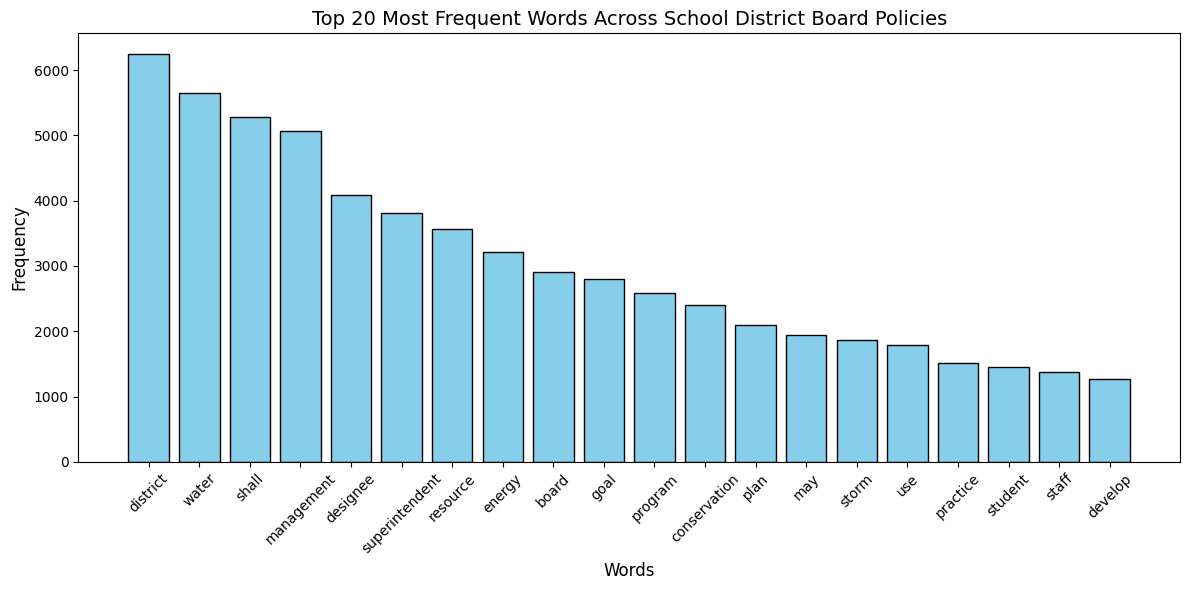

In [333]:
# Get the top 20 frequent words
top_words = Counter(filtered_aggregate_frequency).most_common(20)
words, counts = zip(*top_words)

# Create a bar chart
plt.figure(figsize=(12, 6))
plt.bar(words, counts, color='skyblue', edgecolor='black')
plt.xlabel('Words', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Top 20 Most Frequent Words Across School District Board Policies', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

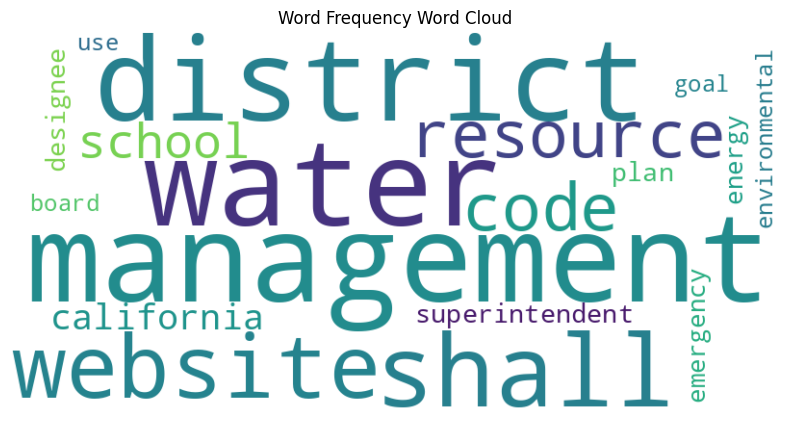

In [334]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(filtered_words)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Frequency Word Cloud')
plt.show

# Indicator Analysis 

### Energy Efficiency

In [335]:
# Calculate the total number of 0s and 1s in the Energy Efficiency column
energy_efficiency_counts = data['Energy Efficiency'].value_counts()

# Display the counts
print("Counts in the 'Energy Efficiency' column:")
print(energy_efficiency_counts)

Counts in the 'Energy Efficiency' column:
Energy Efficiency
0    295
1    278
Name: count, dtype: int64


In [336]:
# List of keywords to filter for Energy Efficiency Indicator 
keywords = ['school energy conservation programs', 'energy-saving initiatives', 'energy efficiency']

# Filter policies containing any of the keywords
policies_with_keywords_in_text = data[data["BP3511: PDF Text"].apply(
    lambda text: any(keyword in str(text).lower() for keyword in keywords)
)]

# Count the number of policies containing the keywords
keyword_count = len(policies_with_keywords_in_text)

# Display the count
print(f"Number of policies containing the keyword(s) {keywords}: {keyword_count}")

# Calculate the total number of 0s and 1s in the Energy Efficiency column
efficiency_counts = policies_with_keywords_in_text['Energy Efficiency'].value_counts()

# Display the total counts
print("\nTotal counts in the 'Energy Efficiency' column:")
print(efficiency_counts)

# Display which keywords were found and their counts
keyword_found_counts = {keyword: policies_with_keywords_in_text["BP3511: PDF Text"].apply(
    lambda text: str(text).lower().count(keyword)
).sum() for keyword in keywords}

print("\nKeyword occurrences:")
for keyword, count in keyword_found_counts.items():
    print(f"'{keyword}': {count}")

# Display the relevant rows
print(f"\nPolicies containing any of the words {keywords}:")
policies_with_keywords_in_text[['District Name', 'BP3511: PDF Text', 'Energy Efficiency']]

Number of policies containing the keyword(s) ['school energy conservation programs', 'energy-saving initiatives', 'energy efficiency']: 28

Total counts in the 'Energy Efficiency' column:
Energy Efficiency
1    16
0    12
Name: count, dtype: int64

Keyword occurrences:
'school energy conservation programs': 0
'energy-saving initiatives': 0
'energy efficiency': 47

Policies containing any of the words ['school energy conservation programs', 'energy-saving initiatives', 'energy efficiency']:


,District Name,BP3511: PDF Text,Energy Efficiency
51,Clovis Unified,board policy 3511 clovis unified school distri...,1
291,Santa Ana Unified,santa ana unified school district board policy...,1
44,Gold Oak Union Elementary,business noninstructional operation bp 3511 en...,0
53,Fresno Unified,fresno usd 3000 bp 3511 business noninstructio...,0
364,Silver Valley Unified,business noninstructional operation bp 3511 en...,1
122,Taft City,book board policy section 3000 business nonins...,1
380,Grossmont Union High,book board policy manual section 3000 business...,1
43,El Dorado Union High,policy 3511 energy water management status ado...,1
204,Walnut Valley Unified,business noninstructional operation bp 3511 en...,1
184,Monrovia Unified,monrovia unified school district board policy ...,1


### On-Site Renewables

In [337]:
# Calculate the total number of 0s and 1s in the On-Site Renewables column
onsite_renewables_counts = data['On-Site Renewables'].value_counts()

# Display the counts
print("Counts in the 'On-Site Renewables' column:")
print(onsite_renewables_counts)

Counts in the 'On-Site Renewables' column:
On-Site Renewables
0    335
1    238
Name: count, dtype: int64


In [338]:
# List of keywords to filter for On-Site Renewables Indicator 
keywords = ['on-site renewable energy', 'solar power', 'wind energy', 'renewable energy']

# Filter policies containing any of the keywords
policies_with_keywords_in_text = data[data["BP3511: PDF Text"].apply(
    lambda text: any(keyword in str(text).lower() for keyword in keywords)
)]

# Count the number of policies containing the keywords
keyword_count = len(policies_with_keywords_in_text)

# Display the count
print(f"Number of policies containing the keyword(s) {keywords}: {keyword_count}")

# Calculate the total number of 0s and 1s in the Energy Efficiency column
efficiency_counts = policies_with_keywords_in_text['On-Site Renewables'].value_counts()

# Display the total counts
print("\nTotal counts in the 'On-Site Renewables' column:")
print(efficiency_counts)

# Display which keywords were found and their counts
keyword_found_counts = {keyword: policies_with_keywords_in_text["BP3511: PDF Text"].apply(
    lambda text: str(text).lower().count(keyword)
).sum() for keyword in keywords}

print("\nKeyword occurrences:")
for keyword, count in keyword_found_counts.items():
    print(f"'{keyword}': {count}")

# Display the relevant rows
print(f"\nPolicies containing any of the words {keywords}:")
policies_with_keywords_in_text[['District Name', 'BP3511: PDF Text', 'On-Site Renewables']]

Number of policies containing the keyword(s) ['on-site renewable energy', 'solar power', 'wind energy', 'renewable energy']: 4

Total counts in the 'On-Site Renewables' column:
On-Site Renewables
0    2
1    2
Name: count, dtype: int64

Keyword occurrences:
'on-site renewable energy': 0
'solar power': 2
'wind energy': 0
'renewable energy': 4

Policies containing any of the words ['on-site renewable energy', 'solar power', 'wind energy', 'renewable energy']:


,District Name,BP3511: PDF Text,On-Site Renewables
533,Santa Rosa Elementary,policy 3511 energy water management status ado...,0
534,Santa Rosa High,policy 3511 energy water management status ado...,0
426,Cabrillo Unified,policy 3511 energy water management status ado...,1
333,Sacramento City Unified,policy 3511 energy water management status ado...,1


### HVAC: AC

In [339]:
# Calculate the total number of 0s and 1s in the HVAC: AC column
HVAC_AC_counts = data['HVAC: AC'].value_counts()

# Display the counts
print("Counts in the 'HVAC: AC' column:")
print(HVAC_AC_counts)

Counts in the 'HVAC: AC' column:
HVAC: AC
1.0    343
0.0    204
Name: count, dtype: int64


In [340]:
# List of keywords to filter for HVAC: AC Indicator 
keywords = ['HVAC systems', 'air conditioning upgrades', 'energy efficient HVAC school buildings', 'HVAC', 'air conditioning']

# Filter policies containing any of the keywords
policies_with_keywords_in_text = data[data["BP3511: PDF Text"].apply(
    lambda text: any(keyword in str(text).lower() for keyword in keywords)
)]

# Count the number of policies containing the keywords
keyword_count = len(policies_with_keywords_in_text)

# Display the count
print(f"Number of policies containing the keyword(s) {keywords}: {keyword_count}")

# Calculate the total number of 0s and 1s in the Energy Efficiency column
efficiency_counts = policies_with_keywords_in_text['HVAC: AC'].value_counts()

# Display the total counts
print("\nTotal counts in the 'HVAC: AC' column:")
print(efficiency_counts)

# Display which keywords were found and their counts
keyword_found_counts = {keyword: policies_with_keywords_in_text["BP3511: PDF Text"].apply(
    lambda text: str(text).lower().count(keyword)
).sum() for keyword in keywords}

print("\nKeyword occurrences:")
for keyword, count in keyword_found_counts.items():
    print(f"'{keyword}': {count}")

# Display the relevant rows
print(f"\nPolicies containing any of the words {keywords}:")
policies_with_keywords_in_text[['District Name', 'BP3511: PDF Text', 'HVAC: AC']]

Number of policies containing the keyword(s) ['HVAC systems', 'air conditioning upgrades', 'energy efficient HVAC school buildings', 'HVAC', 'air conditioning']: 8

Total counts in the 'HVAC: AC' column:
HVAC: AC
1.0    5
0.0    3
Name: count, dtype: int64

Keyword occurrences:
'HVAC systems': 0
'air conditioning upgrades': 0
'energy efficient HVAC school buildings': 0
'HVAC': 0
'air conditioning': 9

Policies containing any of the words ['HVAC systems', 'air conditioning upgrades', 'energy efficient HVAC school buildings', 'HVAC', 'air conditioning']:


,District Name,BP3511: PDF Text,HVAC: AC
217,Larkspur-Corte Madera,business noninstructional operation bp 3511 en...,1.0
200,Whittier Union High,1 whittier union high school district whittier...,1.0
516,Vallejo City Unified,policy 3511 energy water management status ado...,0.0
181,Los Angeles Unified,los angeles unified school district policy bul...,1.0
77,Cuddeback Union Elementary,business noninstructional operation bp 3511 en...,1.0
490,Columbia Elementary,business noninstructional operation bp 3511 en...,0.0
359,Rim of the World Unified,regulation 3511 energy water management regula...,0.0
40,Del Norte County Unified,policy 3511 energy water management status ado...,1.0


### Indoor Air Quality

In [341]:
# Calculate the total number of 0s and 1s in the Indoor Air Quality column
indoor_air_quality_counts = data['Indoor Air Quality'].value_counts()

# Display the counts
print("Counts in the 'Indoor Air Quality' column:")
print(indoor_air_quality_counts)

Counts in the 'Indoor Air Quality' column:
Indoor Air Quality
0.0    290
1.0    256
Name: count, dtype: int64


In [342]:
# List of keywords to filter for Indoor Air Quality Indicator 
keywords = ['indoor air quality', 'air filtration systems', 'air filtration', 'healthy air school initiative', 'air quality', 'IEQ', 'IEQ (Indoor Environmental Quality) Initiative']

# Filter policies containing any of the keywords
policies_with_keywords_in_text = data[data["BP3511: PDF Text"].apply(
    lambda text: any(keyword in str(text).lower() for keyword in keywords)
)]

# Count the number of policies containing the keywords
keyword_count = len(policies_with_keywords_in_text)

# Display the count
print(f"Number of policies containing the keyword(s) {keywords}: {keyword_count}")

# Calculate the total number of 0s and 1s in the Energy Efficiency column
efficiency_counts = policies_with_keywords_in_text['Indoor Air Quality'].value_counts()

# Display the total counts
print("\nTotal counts in the 'Indoor Air Quality' column:")
print(efficiency_counts)

# Display which keywords were found and their counts
keyword_found_counts = {keyword: policies_with_keywords_in_text["BP3511: PDF Text"].apply(
    lambda text: str(text).lower().count(keyword)
).sum() for keyword in keywords}

print("\nKeyword occurrences:")
for keyword, count in keyword_found_counts.items():
    print(f"'{keyword}': {count}")

# Display the relevant rows
print(f"\nPolicies containing any of the words {keywords}:")
policies_with_keywords_in_text[['District Name', 'BP3511: PDF Text', 'Indoor Air Quality']]

Number of policies containing the keyword(s) ['indoor air quality', 'air filtration systems', 'air filtration', 'healthy air school initiative', 'air quality', 'IEQ', 'IEQ (Indoor Environmental Quality) Initiative']: 1

Total counts in the 'Indoor Air Quality' column:
Indoor Air Quality
1.0    1
Name: count, dtype: int64

Keyword occurrences:
'indoor air quality': 1
'air filtration systems': 0
'air filtration': 0
'healthy air school initiative': 0
'air quality': 1
'IEQ': 0
'IEQ (Indoor Environmental Quality) Initiative': 0

Policies containing any of the words ['indoor air quality', 'air filtration systems', 'air filtration', 'healthy air school initiative', 'air quality', 'IEQ', 'IEQ (Indoor Environmental Quality) Initiative']:


,District Name,BP3511: PDF Text,Indoor Air Quality
228,Mariposa County Unified,book board policy section 3000 business nonins...,1.0


### Energy Resilience 

In [343]:
# Calculate the total number of 0s and 1s in the Energy Resilience column
energy_resilience_counts = data['Energy Resilience'].value_counts()

# Display the counts
print("Counts in the 'Energy Resilience' column:")
print(energy_resilience_counts)

Counts in the 'Energy Resilience' column:
Energy Resilience
0    405
1    168
Name: count, dtype: int64


In [344]:
# List of keywords to filter for Energy Resilience Indicator 
keywords = ['energy resilience', 'energy backup', 'renewable energy storage', 'renewable energy', 'energy storage']

# Filter policies containing any of the keywords
policies_with_keywords_in_text = data[data["BP3511: PDF Text"].apply(
    lambda text: any(keyword in str(text).lower() for keyword in keywords)
)]

# Count the number of policies containing the keywords
keyword_count = len(policies_with_keywords_in_text)

# Display the count
print(f"Number of policies containing the keyword(s) {keywords}: {keyword_count}")

# Calculate the total number of 0s and 1s in the Energy Efficiency column
efficiency_counts = policies_with_keywords_in_text['Energy Resilience'].value_counts()

# Display the total counts
print("\nTotal counts in the 'Energy Resilience' column:")
print(efficiency_counts)

# Display which keywords were found and their counts
keyword_found_counts = {keyword: policies_with_keywords_in_text["BP3511: PDF Text"].apply(
    lambda text: str(text).lower().count(keyword)
).sum() for keyword in keywords}

print("\nKeyword occurrences:")
for keyword, count in keyword_found_counts.items():
    print(f"'{keyword}': {count}")

# Display the relevant rows
print(f"\nPolicies containing any of the words {keywords}:")
policies_with_keywords_in_text[['District Name', 'BP3511: PDF Text', 'Energy Resilience']]

Number of policies containing the keyword(s) ['energy resilience', 'energy backup', 'renewable energy storage', 'renewable energy', 'energy storage']: 2

Total counts in the 'Energy Resilience' column:
Energy Resilience
0    1
1    1
Name: count, dtype: int64

Keyword occurrences:
'energy resilience': 0
'energy backup': 0
'renewable energy storage': 0
'renewable energy': 4
'energy storage': 0

Policies containing any of the words ['energy resilience', 'energy backup', 'renewable energy storage', 'renewable energy', 'energy storage']:


,District Name,BP3511: PDF Text,Energy Resilience
426,Cabrillo Unified,policy 3511 energy water management status ado...,0
333,Sacramento City Unified,policy 3511 energy water management status ado...,1


### Fleet Electrification

In [345]:
# Calculate the total number of 0s and 1s in the EV Chargers for Fleet Electrification column
fleet_electrification_counts = data['Fleet Electrification'].value_counts()

# Display the counts
print("Counts in the 'Fleet Electrification' column:")
print(fleet_electrification_counts)

Counts in the 'Fleet Electrification' column:
Fleet Electrification
0.0    470
1.0    102
Name: count, dtype: int64


In [346]:
# List of keywords to filter for Fleet Electrification Indicator 
keywords = ['electric school buses', 'fleet electrification schools', 'school district EV fleet', 'electric school bus', 'electric vehicle']

# Filter policies containing any of the keywords
policies_with_keywords_in_text = data[data["BP3511: PDF Text"].apply(
    lambda text: any(keyword in str(text).lower() for keyword in keywords)
)]

# Count the number of policies containing the keywords
keyword_count = len(policies_with_keywords_in_text)

# Display the count
print(f"Number of policies containing the keyword(s) {keywords}: {keyword_count}")

# Calculate the total number of 0s and 1s in the Energy Efficiency column
efficiency_counts = policies_with_keywords_in_text['Fleet Electrification'].value_counts()

# Display the total counts
print("\nTotal counts in the 'Fleet Electrification' column:")
print(efficiency_counts)

# Display which keywords were found and their counts
keyword_found_counts = {keyword: policies_with_keywords_in_text["BP3511: PDF Text"].apply(
    lambda text: str(text).lower().count(keyword)
).sum() for keyword in keywords}

print("\nKeyword occurrences:")
for keyword, count in keyword_found_counts.items():
    print(f"'{keyword}': {count}")

# Display the relevant rows
print(f"\nPolicies containing any of the words {keywords}:")
policies_with_keywords_in_text[['District Name', 'BP3511: PDF Text', 'Fleet Electrification']]

Number of policies containing the keyword(s) ['electric school buses', 'fleet electrification schools', 'school district EV fleet', 'electric school bus', 'electric vehicle']: 0

Total counts in the 'Fleet Electrification' column:
Series([], Name: count, dtype: int64)

Keyword occurrences:
'electric school buses': 0
'fleet electrification schools': 0
'school district EV fleet': 0
'electric school bus': 0
'electric vehicle': 0

Policies containing any of the words ['electric school buses', 'fleet electrification schools', 'school district EV fleet', 'electric school bus', 'electric vehicle']:


,District Name,BP3511: PDF Text,Fleet Electrification


### EV Chargers for Parking (not fleet)

In [347]:
# Calculate the total number of 0s and 1s in the EV Chargers for Parking (not fleet) column
EV_chargers_counts = data['EV Chargers for Parking'].value_counts()

# Display the counts
print("Counts in the 'EV Chargers for Parking' column:")
print(EV_chargers_counts)

Counts in the 'EV Chargers for Parking' column:
EV Chargers for Parking
0.0    500
1.0     72
Name: count, dtype: int64


In [348]:
# List of keywords to filter for EV Chargers for Parking (not fleet) Indicator 
keywords = ['school EV charging stations', 'electric vehicle chargers schools', 'public EV charging school parking']

# Filter policies containing any of the keywords
policies_with_keywords_in_text = data[data["BP3511: PDF Text"].apply(
    lambda text: any(keyword in str(text).lower() for keyword in keywords)
)]

# Count the number of policies containing the keywords
keyword_count = len(policies_with_keywords_in_text)

# Display the count
print(f"Number of policies containing the keyword(s) {keywords}: {keyword_count}")

# Calculate the total number of 0s and 1s in the Energy Efficiency column
efficiency_counts = policies_with_keywords_in_text['EV Chargers for Parking'].value_counts()

# Display the total counts
print("\nTotal counts in the 'EV Chargers for Parking' column:")
print(efficiency_counts)

# Display which keywords were found and their counts
keyword_found_counts = {keyword: policies_with_keywords_in_text["BP3511: PDF Text"].apply(
    lambda text: str(text).lower().count(keyword)
).sum() for keyword in keywords}

print("\nKeyword occurrences:")
for keyword, count in keyword_found_counts.items():
    print(f"'{keyword}': {count}")

# Display the relevant rows
print(f"\nPolicies containing any of the words {keywords}:")
policies_with_keywords_in_text[['District Name', 'BP3511: PDF Text', 'EV Chargers for Parking']]

Number of policies containing the keyword(s) ['school EV charging stations', 'electric vehicle chargers schools', 'public EV charging school parking']: 0

Total counts in the 'EV Chargers for Parking' column:
Series([], Name: count, dtype: int64)

Keyword occurrences:
'school EV charging stations': 0
'electric vehicle chargers schools': 0
'public EV charging school parking': 0

Policies containing any of the words ['school EV charging stations', 'electric vehicle chargers schools', 'public EV charging school parking']:


,District Name,BP3511: PDF Text,EV Chargers for Parking


### Water Conservation

In [349]:
# Calculate the total number of 0s and 1s in the Water Conservation column
water_conservation_counts = data['Water Conservation'].value_counts()

# Display the counts
print("Counts in the 'Water Conservation' column:")
print(water_conservation_counts)

Counts in the 'Water Conservation' column:
Water Conservation
0    403
1    170
Name: count, dtype: int64


In [350]:
# List of keywords to filter for Water Conservation Indicator 
# added water conservation, water efficiency, water-saving
keywords = ['water conservation in schools', 'school district water-saving', 'water efficiency educational institutions', 'water conservation', 'water efficiency', 'water-saving']

# Filter policies containing any of the keywords
policies_with_keywords_in_text = data[data["BP3511: PDF Text"].apply(
    lambda text: any(keyword in str(text).lower() for keyword in keywords)
)]

# Count the number of policies containing the keywords
keyword_count = len(policies_with_keywords_in_text)

# Display the count
print(f"Number of policies containing the keyword(s) {keywords}: {keyword_count}")

# Calculate the total number of 0s and 1s in the Energy Efficiency column
efficiency_counts = policies_with_keywords_in_text['Water Conservation'].value_counts()

# Display the total counts
print("\nTotal counts in the 'Water Conservation' column:")
print(efficiency_counts)

# Display which keywords were found and their counts
keyword_found_counts = {keyword: policies_with_keywords_in_text["BP3511: PDF Text"].apply(
    lambda text: str(text).lower().count(keyword)
).sum() for keyword in keywords}

print("\nKeyword occurrences:")
for keyword, count in keyword_found_counts.items():
    print(f"'{keyword}': {count}")

# Display the relevant rows
print(f"\nPolicies containing any of the words {keywords}:")
policies_with_keywords_in_text[['District Name', 'BP3511: PDF Text', 'Water Conservation']]

Number of policies containing the keyword(s) ['water conservation in schools', 'school district water-saving', 'water efficiency educational institutions', 'water conservation', 'water efficiency', 'water-saving']: 61

Total counts in the 'Water Conservation' column:
Water Conservation
0    39
1    22
Name: count, dtype: int64

Keyword occurrences:
'water conservation in schools': 0
'school district water-saving': 0
'water efficiency educational institutions': 0
'water conservation': 120
'water efficiency': 4
'water-saving': 0

Policies containing any of the words ['water conservation in schools', 'school district water-saving', 'water efficiency educational institutions', 'water conservation', 'water efficiency', 'water-saving']:


,District Name,BP3511: PDF Text,Water Conservation
51,Clovis Unified,board policy 3511 clovis unified school distri...,1
338,Hollister,bp 3511 board policy business noninstructional...,1
291,Santa Ana Unified,santa ana unified school district board policy...,1
292,Saddleback Valley Unified,saddleback valley unified school district bp 3...,0
44,Gold Oak Union Elementary,business noninstructional operation bp 3511 en...,0
...,...,...,...
553,Patterson Joint Unified,policy 3511 energy water management status ado...,0
37,Pittsburg Unified,policy 3511 energy water management status ado...,1
444,Buellton Union Elementary,policy 3511 energy water management status ado...,0
205,Acton-Agua Dulce Unified,policy 3511 energy water management status ado...,0


### Zero Waste Initiative

In [351]:
# Calculate the total number of 0s and 1s in the Zero Waste Initiative column
zero_waste_counts = data['Zero Waste Initiative'].value_counts()

# Display the counts
print("Counts in the 'Zero Waste Initiative' column:")
print(zero_waste_counts)

Counts in the 'Zero Waste Initiative' column:
Zero Waste Initiative
0    449
1    124
Name: count, dtype: int64


In [352]:
# List of keywords to filter for Zero Waste Initiative Indicator 
keywords = ['zero waste schools', 'waste reduction initiatives', 'school district recycling programs', 'recycling', 'waste reduction', 'zero waste']

# Filter policies containing any of the keywords
policies_with_keywords_in_text = data[data["BP3511: PDF Text"].apply(
    lambda text: any(keyword in str(text).lower() for keyword in keywords)
)]

# Count the number of policies containing the keywords
keyword_count = len(policies_with_keywords_in_text)

# Display the count
print(f"Number of policies containing the keyword(s) {keywords}: {keyword_count}")

# Calculate the total number of 0s and 1s in the Energy Efficiency column
efficiency_counts = policies_with_keywords_in_text['Zero Waste Initiative'].value_counts()

# Display the total counts
print("\nTotal counts in the 'Zero Waste Initiative' column:")
print(efficiency_counts)

# Display which keywords were found and their counts
keyword_found_counts = {keyword: policies_with_keywords_in_text["BP3511: PDF Text"].apply(
    lambda text: str(text).lower().count(keyword)
).sum() for keyword in keywords}

print("\nKeyword occurrences:")
for keyword, count in keyword_found_counts.items():
    print(f"'{keyword}': {count}")

# Display the relevant rows
print(f"\nPolicies containing any of the words {keywords}:")
policies_with_keywords_in_text[['District Name', 'BP3511: PDF Text', 'Zero Waste Initiative']]

Number of policies containing the keyword(s) ['zero waste schools', 'waste reduction initiatives', 'school district recycling programs', 'recycling', 'waste reduction', 'zero waste']: 194

Total counts in the 'Zero Waste Initiative' column:
Zero Waste Initiative
0    148
1     46
Name: count, dtype: int64

Keyword occurrences:
'zero waste schools': 0
'waste reduction initiatives': 0
'school district recycling programs': 0
'recycling': 197
'waste reduction': 3
'zero waste': 0

Policies containing any of the words ['zero waste schools', 'waste reduction initiatives', 'school district recycling programs', 'recycling', 'waste reduction', 'zero waste']:


,District Name,BP3511: PDF Text,Zero Waste Initiative
151,Antelope Valley Union High,policy 3511 energy water management status ado...,0
336,Natomas Unified,bp 3511 business noninstructional operation en...,1
170,El Segundo Unified,book board policy section 3000 business nonins...,0
566,Los Molinos Unified,bp 3511 business noninstructional operation ma...,0
357,Redlands Unified,policy 3511 energy water management status ado...,0
...,...,...,...
57,Pacific Union Elementary,policy 3511 energy water management status ado...,1
84,Pacific Union Elementary,policy 3511 energy water management status ado...,1
99,San Pasqual Valley Unified,policy 3511 energy water management status ado...,0
37,Pittsburg Unified,policy 3511 energy water management status ado...,0


### Schoolyard Forest

In [353]:
# Calculate the total number of 0s and 1s in the Schoolyard Forest column
schoolyard_forest_counts = data['Schoolyard Forest'].value_counts()

# Display the counts
print("Counts in the 'Schoolyard Forest' column:")
print(schoolyard_forest_counts)

Counts in the 'Schoolyard Forest' column:
Schoolyard Forest
0    538
1     35
Name: count, dtype: int64


In [354]:
# List of keywords to filter for Schoolyard Forest Indicator 
keywords = ['schoolyard forest program', 'urban forestry schools', 'tree planting educational campus', 'forest', 'planting']
# Filter policies containing any of the keywords
policies_with_keywords_in_text = data[data["BP3511: PDF Text"].apply(
    lambda text: any(keyword in str(text).lower() for keyword in keywords)
)]

# Count the number of policies containing the keywords
keyword_count = len(policies_with_keywords_in_text)

# Display the count
print(f"Number of policies containing the keyword(s) {keywords}: {keyword_count}")

# Calculate the total number of 0s and 1s in the Energy Efficiency column
efficiency_counts = policies_with_keywords_in_text['Schoolyard Forest'].value_counts()

# Display the total counts
print("\nTotal counts in the 'Schoolyard Forest' column:")
print(efficiency_counts)

# Display which keywords were found and their counts
keyword_found_counts = {keyword: policies_with_keywords_in_text["BP3511: PDF Text"].apply(
    lambda text: str(text).lower().count(keyword)
).sum() for keyword in keywords}

print("\nKeyword occurrences:")
for keyword, count in keyword_found_counts.items():
    print(f"'{keyword}': {count}")

# Display the relevant rows
print(f"\nPolicies containing any of the words {keywords}:")
policies_with_keywords_in_text[['District Name', 'BP3511: PDF Text', 'Schoolyard Forest']]

Number of policies containing the keyword(s) ['schoolyard forest program', 'urban forestry schools', 'tree planting educational campus', 'forest', 'planting']: 1

Total counts in the 'Schoolyard Forest' column:
Schoolyard Forest
0    1
Name: count, dtype: int64

Keyword occurrences:
'schoolyard forest program': 0
'urban forestry schools': 0
'tree planting educational campus': 0
'forest': 1
'planting': 0

Policies containing any of the words ['schoolyard forest program', 'urban forestry schools', 'tree planting educational campus', 'forest', 'planting']:


,District Name,BP3511: PDF Text,Schoolyard Forest
298,Foresthill Union Elementary,policy 3511 energy water management status ado...,0


### School Gardens

In [355]:
# Calculate the total number of 0s and 1s in the School Gardens column
school_gardens_counts = data['School Gardens'].value_counts()

# Display the counts
print("Counts in the 'School Gardens' column:")
print(school_gardens_counts)

Counts in the 'School Gardens' column:
School Gardens
1    305
0    268
Name: count, dtype: int64


In [356]:
# List of keywords to filter for School Gardens Indicator 
keywords = ['school garden projects', 'edible gardens in schools', 'educational gardens school district', 'interactive gardens', 'garden', 'native gardens', 'gardens']
# Filter policies
policies_with_keywords_in_text = data[data["BP3511: PDF Text"].apply(
    lambda text: any(keyword in str(text).lower() for keyword in keywords)
)]

# Count the number of policies containing the keywords
keyword_count = len(policies_with_keywords_in_text)

# Display the count
print(f"Number of policies containing the keyword(s) {keywords}: {keyword_count}")

# Calculate the total number of 0s and 1s in the Energy Efficiency column
efficiency_counts = policies_with_keywords_in_text['School Gardens'].value_counts()

# Display the total counts
print("\nTotal counts in the 'School Gardens' column:")
print(efficiency_counts)

# Display which keywords were found and their counts
keyword_found_counts = {keyword: policies_with_keywords_in_text["BP3511: PDF Text"].apply(
    lambda text: str(text).lower().count(keyword)
).sum() for keyword in keywords}

print("\nKeyword occurrences:")
for keyword, count in keyword_found_counts.items():
    print(f"'{keyword}': {count}")

# Display the relevant rows
print(f"\nPolicies containing any of the words {keywords}:")
policies_with_keywords_in_text[['District Name', 'BP3511: PDF Text', 'School Gardens']]

Number of policies containing the keyword(s) ['school garden projects', 'edible gardens in schools', 'educational gardens school district', 'interactive gardens', 'garden', 'native gardens', 'gardens']: 0

Total counts in the 'School Gardens' column:
Series([], Name: count, dtype: int64)

Keyword occurrences:
'school garden projects': 0
'edible gardens in schools': 0
'educational gardens school district': 0
'interactive gardens': 0
'garden': 0
'native gardens': 0
'gardens': 0

Policies containing any of the words ['school garden projects', 'edible gardens in schools', 'educational gardens school district', 'interactive gardens', 'garden', 'native gardens', 'gardens']:


,District Name,BP3511: PDF Text,School Gardens


### Indicators Summary

Indicator Summary:
                    Indicator  Count_1s  Count_0s
0   Building Electrification     220.0     353.0
1          Energy Efficiency     278.0     295.0
2         On-Site Renewables     238.0     335.0
3                   HVAC: AC     343.0     230.0
4         Indoor Air Quality     256.0     317.0
5          Energy Resilience     168.0     405.0
6      Fleet Electrification     102.0     471.0
7    EV Chargers for Parking      72.0     501.0
8         Water Conservation     170.0     403.0
9      Zero Waste Initiative     124.0     449.0
10         Schoolyard Forest      35.0     538.0
11            School Gardens     305.0     268.0


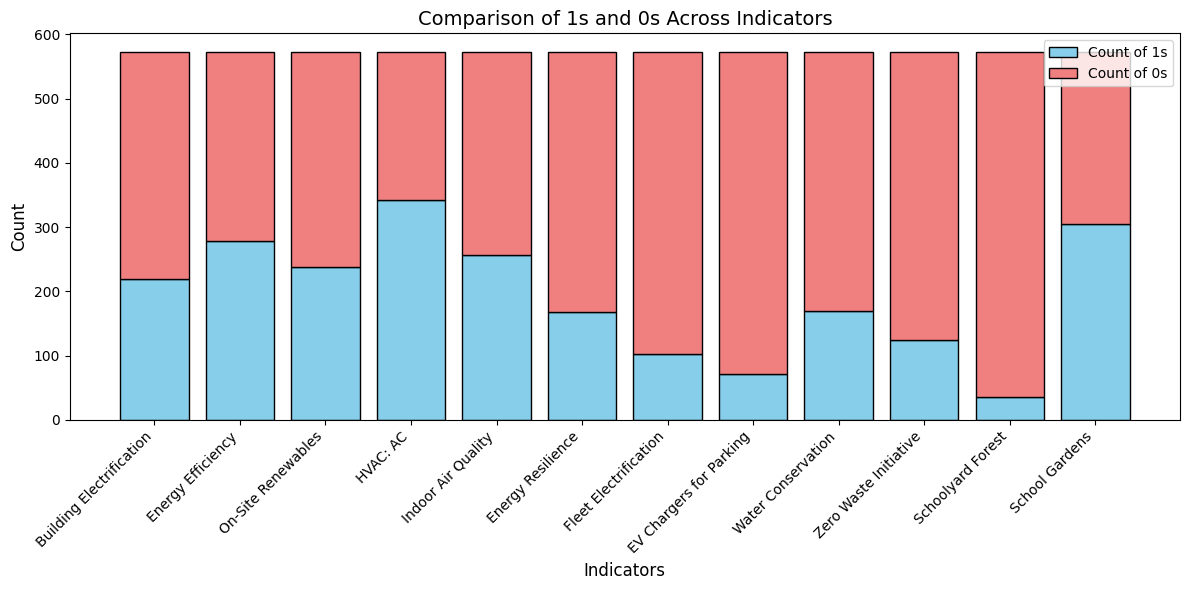

In [357]:
# List of indicator columns 
indicator_columns = ['Building Electrification', 'Energy Efficiency', 'On-Site Renewables', 'HVAC: AC', 'Indoor Air Quality', 'Energy Resilience', 'Fleet Electrification', 'EV Chargers for Parking', 'Water Conservation', 'Zero Waste Initiative', 'Schoolyard Forest', 'School Gardens']  # Replace with your actual column names

# Calculate the counts of 1s and 0s for each indicator
indicator_summary = pd.DataFrame({
    'Indicator': indicator_columns,
    'Count_1s': [data[col].sum() for col in indicator_columns],  
    'Count_0s': [len(data[col]) - data[col].sum() for col in indicator_columns]  
})

# Display the summary table
print("Indicator Summary:\n", indicator_summary)

# Plot the results
plt.figure(figsize=(12, 6))

# Stacked bar chart for counts of 1s and 0s
plt.bar(indicator_summary['Indicator'], indicator_summary['Count_1s'], label='Count of 1s', color='skyblue', edgecolor='black')
plt.bar(indicator_summary['Indicator'], indicator_summary['Count_0s'], bottom=indicator_summary['Count_1s'], label='Count of 0s', color='lightcoral', edgecolor='black')

# Add labels and title
plt.xlabel('Indicators', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Comparison of 1s and 0s Across Indicators', fontsize=14)
plt.legend()
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()

### Scoville Scale Language Menu of Possible Revisions

In [395]:
# Mild, medium, spicy for Strategy 1 
# Text from the PDF 
mild_text = "The Superintendent or designee shall regularly inspect district facilities and operations and make recommendations for maintenance and capital expenditures which may help the district reach its conservation and management goals"
medium_text = "The Superintendent or designee shall regularly inspect district facilities and operations and develop and implement plans for maintenance and capital expenditures to achieve the district’s conservation and management goals"
spicy_text = "The Superintendent or designee shall inspect district facilities and operations on a [timeline] basis and develop and implement plans for maintenance and capital expenditures to achieve the district’s conservation and management goals, including but not limited to: Replacing machinery or HVAC systems with the most energy efficient options available Installing renewable energy upgrades or alternatives Determining and implementing the most water-conserving methods for facilities across the district Ensuring all new construction follows guidelines developed to achieve the district’s energy and water conservation goals"

commitment_texts = {
    'Mild': mild_text,
    'Medium': medium_text,
    'Spicy': spicy_text
}

# Define function 
def classify_policy(policy_text, commitment_texts):
    if not isinstance(policy_text, str) or not policy_text.strip():
        return None  
    
    # Combine the commitment texts and the policy text
    texts = list(commitment_texts.values()) + [policy_text]
    
    # Compute TF-IDF and cosine similarity
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(texts)
    similarities = cosine_similarity(tfidf_matrix[-1:], tfidf_matrix[:-1]).flatten()
    
    # Return the category with the highest similarity
    best_match = max(zip(commitment_texts.keys(), similarities), key=lambda x: x[1])
    return best_match

# Apply classification to each policy
data['Classification'] = data['BP3511: PDF Text'].apply(lambda x: classify_policy(x, commitment_texts))
# Split classification results into separate columns
data[['Assigned Level', 'Similarity Score']] = data['Classification'].apply(
    lambda x: pd.Series(x) if x else pd.Series([None, None])
)

# Display the classification results
data[['District Name', 'BP3511: PDF Text', 'Assigned Level', 'Similarity Score']]


,District Name,BP3511: PDF Text,Assigned Level,Similarity Score
293,Tustin Unified,book policy manual section 3000 business servi...,Medium,0.042996
51,Clovis Unified,board policy 3511 clovis unified school distri...,Spicy,0.278216
259,Salinas Union High,salina union high school district business pol...,Spicy,0.174673
338,Hollister,bp 3511 board policy business noninstructional...,Spicy,0.192236
291,Santa Ana Unified,santa ana unified school district board policy...,Spicy,0.243863
...,...,...,...,...
430,Pacifica,policy 3511 energy water management status ado...,Mild,0.210545
400,San Marcos Unified,policy 3511 energy water management status ado...,Mild,0.210272
333,Sacramento City Unified,policy 3511 energy water management status ado...,Spicy,0.178084
83,McKinleyville Union Elementary,policy 3511 energy water management status ado...,Mild,0.206856


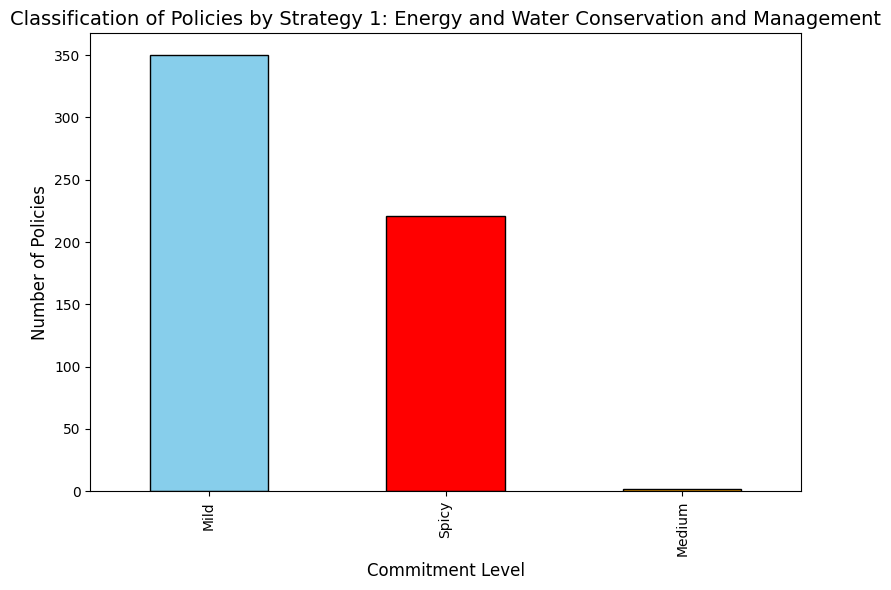

In [397]:
# Count the number of policies in each classification level
classification_counts = data['Assigned Level'].value_counts()

# Bar chart of classification levels
plt.figure(figsize=(8, 6))
classification_counts.plot(kind='bar', color=['skyblue', 'red', 'orange'], edgecolor='black')
plt.xlabel('Commitment Level', fontsize=12)
plt.ylabel('Number of Policies', fontsize=12)
plt.title('Classification of Policies by Strategy 1: Energy and Water Conservation and Management', fontsize=14)
plt.tight_layout()
plt.show()

In [398]:
# Count the number of policies in each category
category_counts = data['Assigned Level'].value_counts()

# Display the counts
print("Number of Policies in Each Category:")
print(category_counts)

Number of Policies in Each Category:
Assigned Level
Mild      350
Spicy     221
Medium      2
Name: count, dtype: int64


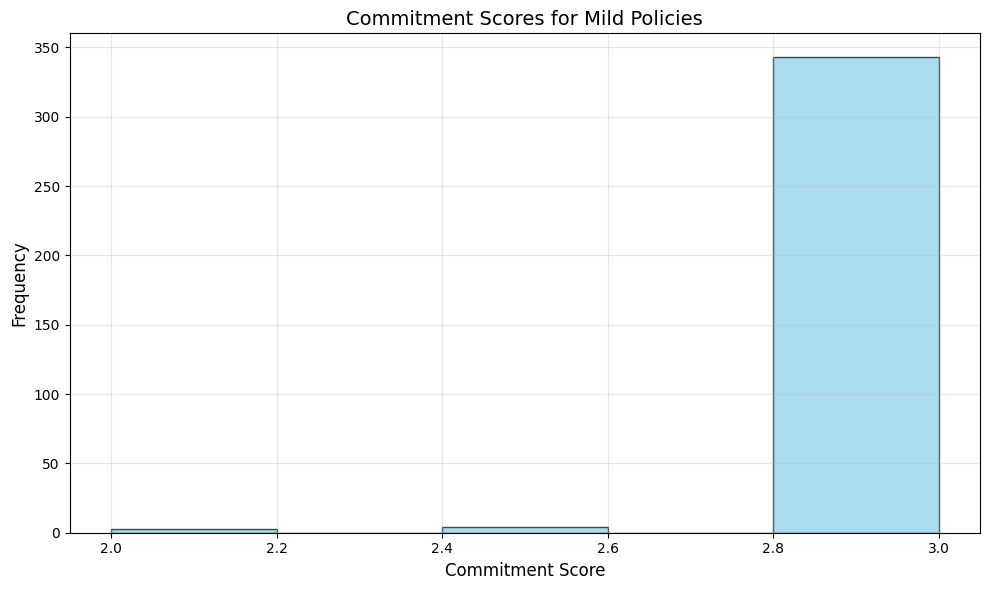

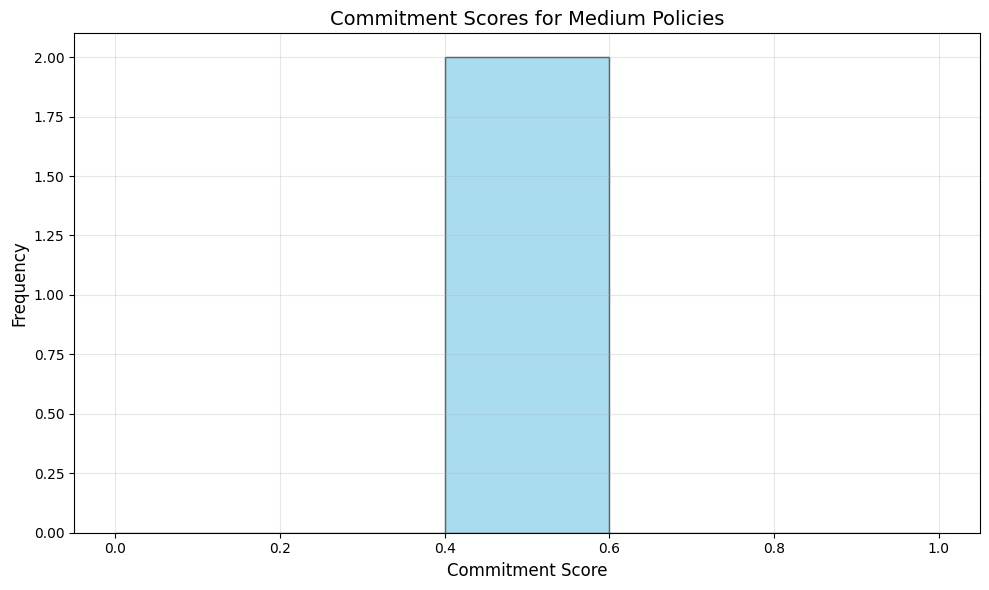

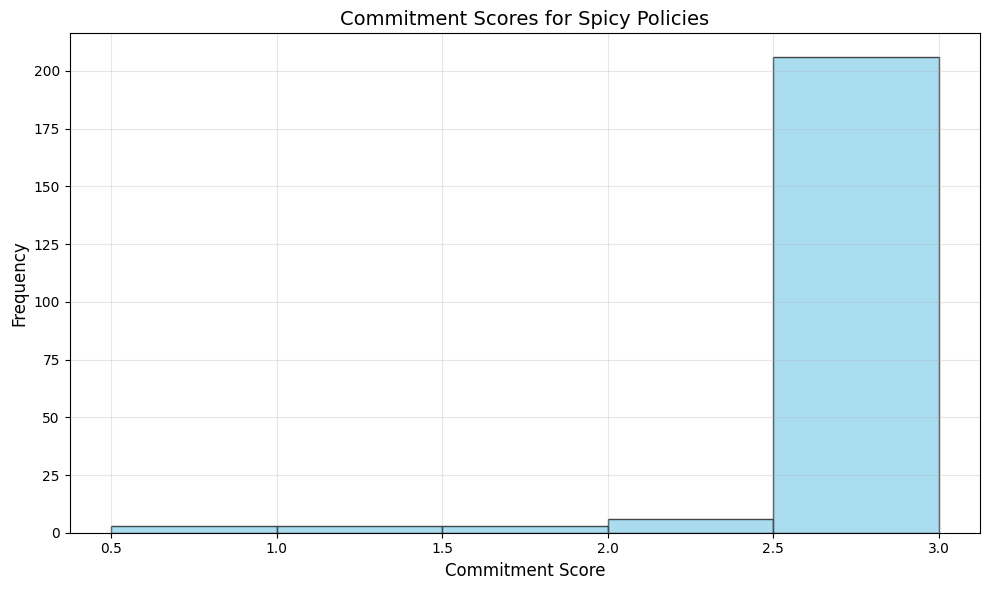

In [399]:
# Filter data for each commitment level
mild_policies = data[data['Assigned Level'] == 'Mild']
medium_policies = data[data['Assigned Level'] == 'Medium']
spicy_policies = data[data['Assigned Level'] == 'Spicy']

import matplotlib.pyplot as plt

# Function to plot commitment scores for a given level
def plot_commitment_scores(policies, level):
    plt.figure(figsize=(10, 6))
    plt.hist(policies['School Board Policy Commitments Score (out of 3)'], bins=5, color='skyblue', edgecolor='black', alpha=0.7)
    plt.xlabel('Commitment Score', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.title(f'Commitment Scores for {level} Policies', fontsize=14)
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

# Plot for Mild policies
plot_commitment_scores(mild_policies, 'Mild')

# Plot for Medium policies
plot_commitment_scores(medium_policies, 'Medium')

# Plot for Spicy policies
plot_commitment_scores(spicy_policies, 'Spicy')

In [400]:
# Mild, medium, spicy for Strategy 2  
# Text from the PDF 
mild_text = "The Superintendent or designee shall make every effort to identify funding opportunities and cost-reducing incentive programs to help the district achieve its conservation and management goals. The Superintendent or designee shall periodically report to the Board on the district's  progress in meeting its conservation and management goals"
medium_text = "The Superintendent or designee shall identify funding opportunities and develop and implement cost-reducing incentive programs to help the district achieve its conservation and management goals. The Superintendent or designee shall periodically report to the Board on the district's progress in meeting its conservation and management goals"
spicy_text = "The Superintendent or designee shall allocate funding and develop and implement cost-reducing incentive programs to achieve the district’s conservation and  management goals, including K-12 student involvement via experiential learning and curricular participation. The Superintendent or designee shall report to the Board on a [timeline] basis on the district's progress in meeting its conservation and management goals"

commitment_texts = {
    'Mild': mild_text,
    'Medium': medium_text,
    'Spicy': spicy_text
}


# Define function
def classify_policy(policy_text, commitment_texts):
    if not isinstance(policy_text, str) or not policy_text.strip():
        return None 
    
    # Combine commitment texts and the policy text
    texts = list(commitment_texts.values()) + [policy_text]
    
    # Compute TF-IDF and cosine similarity
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(texts)
    similarities = cosine_similarity(tfidf_matrix[-1:], tfidf_matrix[:-1]).flatten()
    
    # Return category with the highest similarity
    best_match = max(zip(commitment_texts.keys(), similarities), key=lambda x: x[1])
    return best_match

# Apply classification to each policy
data['Classification'] = data['BP3511: PDF Text'].apply(lambda x: classify_policy(x, commitment_texts))
# Split classification results into separate columns
data[['Assigned Level', 'Similarity Score']] = data['Classification'].apply(
    lambda x: pd.Series(x) if x else pd.Series([None, None])
)

# Display classification results
data[['District Name', 'BP3511: PDF Text', 'Assigned Level', 'Similarity Score']]

,District Name,BP3511: PDF Text,Assigned Level,Similarity Score
293,Tustin Unified,book policy manual section 3000 business servi...,Spicy,0.039881
51,Clovis Unified,board policy 3511 clovis unified school distri...,Mild,0.140826
259,Salinas Union High,salina union high school district business pol...,Mild,0.138928
338,Hollister,bp 3511 board policy business noninstructional...,Mild,0.180307
291,Santa Ana Unified,santa ana unified school district board policy...,Mild,0.178575
...,...,...,...,...
430,Pacifica,policy 3511 energy water management status ado...,Mild,0.218791
400,San Marcos Unified,policy 3511 energy water management status ado...,Mild,0.218522
333,Sacramento City Unified,policy 3511 energy water management status ado...,Medium,0.145784
83,McKinleyville Union Elementary,policy 3511 energy water management status ado...,Mild,0.216337


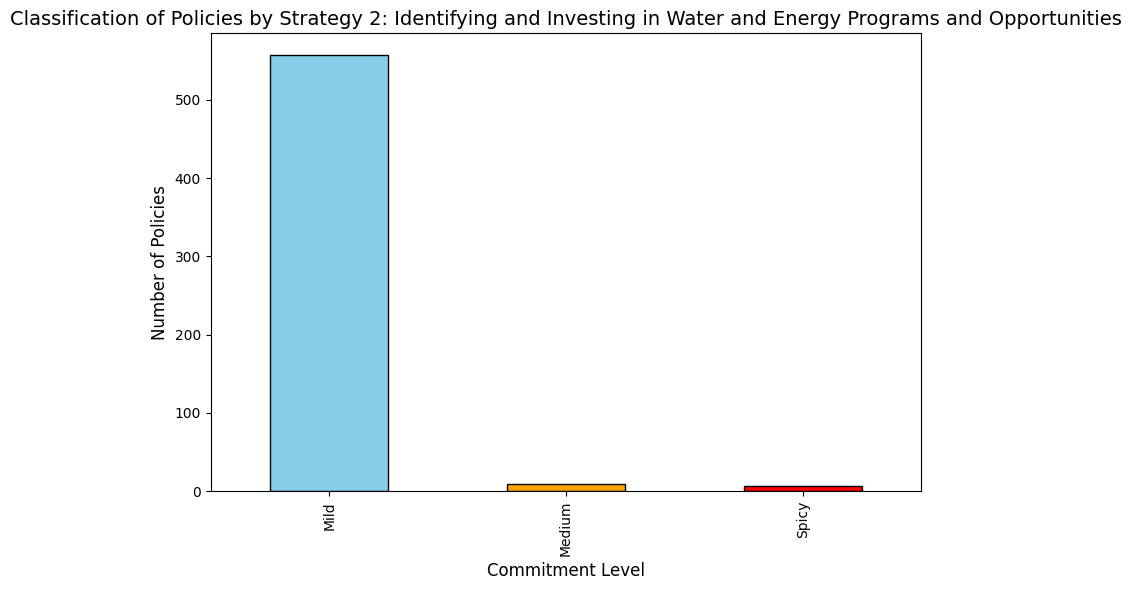

In [402]:
# Count the number of policies in each classification level
classification_counts = data['Assigned Level'].value_counts()

# Bar chart of classification levels
plt.figure(figsize=(8, 6))
classification_counts.plot(kind='bar', color=['skyblue', 'orange', 'red'], edgecolor='black')
plt.xlabel('Commitment Level', fontsize=12)
plt.ylabel('Number of Policies', fontsize=12)
plt.title('Classification of Policies by Strategy 2: Identifying and Investing in Water and Energy Programs and Opportunities', fontsize=14)
plt.tight_layout()
plt.show()

In [388]:
# Count the number of policies in each category
category_counts = data['Assigned Level'].value_counts()

# Display counts
print("Number of Policies in Each Category:")
print(category_counts)

Number of Policies in Each Category:
Assigned Level
Mild      557
Medium      9
Spicy       7
Name: count, dtype: int64


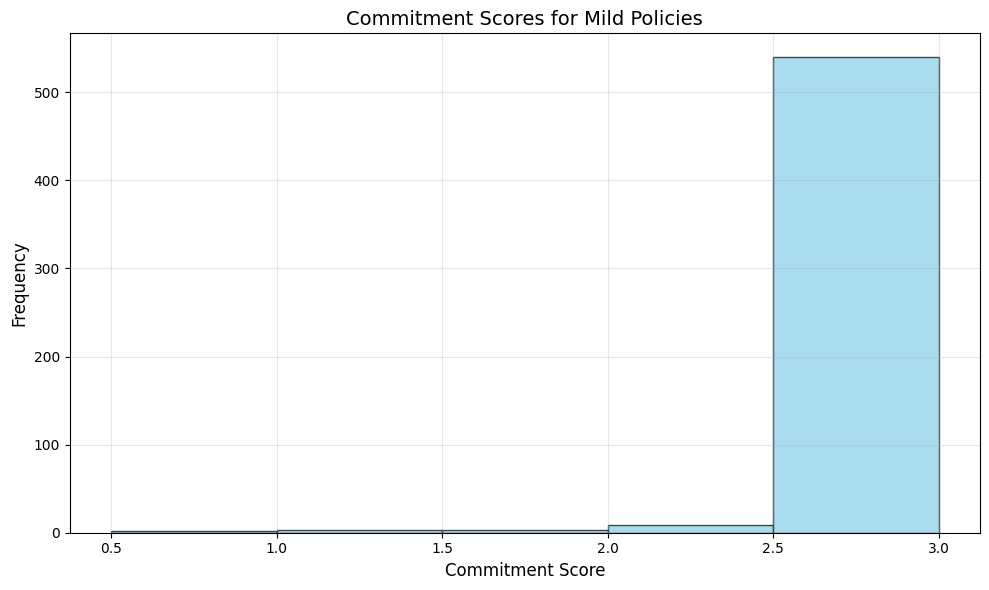

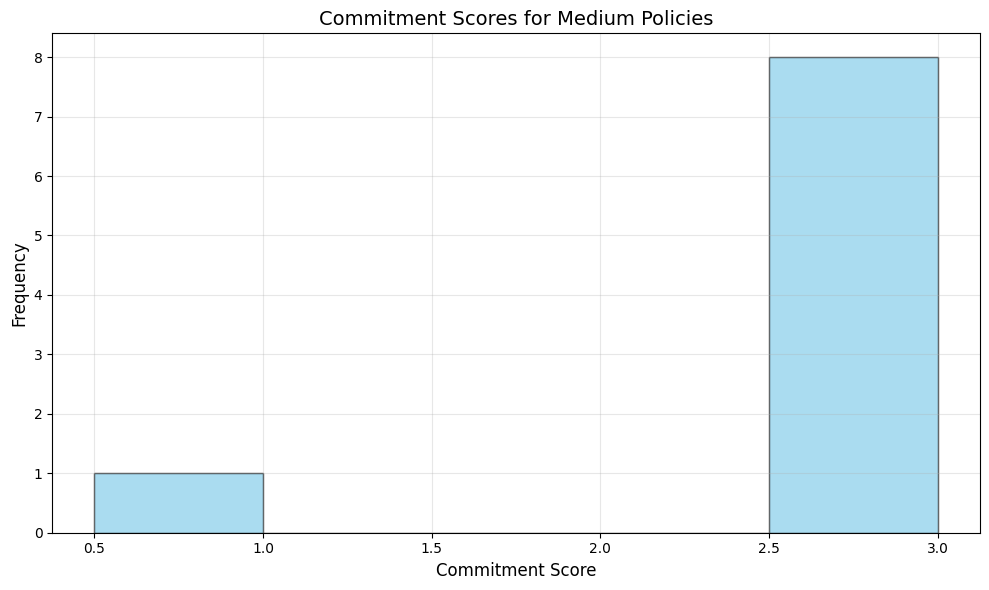

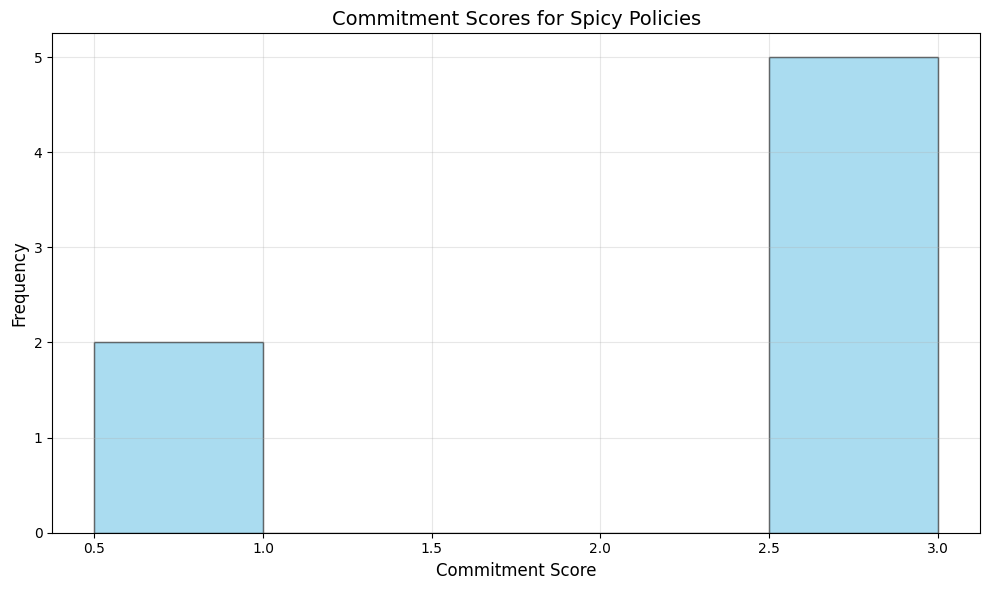

In [389]:
# Filter data for each commitment level
mild_policies = data[data['Assigned Level'] == 'Mild']
medium_policies = data[data['Assigned Level'] == 'Medium']
spicy_policies = data[data['Assigned Level'] == 'Spicy']


# Function to plot commitment scores 
def plot_commitment_scores(policies, level):
    plt.figure(figsize=(10, 6))
    plt.hist(policies['School Board Policy Commitments Score (out of 3)'], bins=5, color='skyblue', edgecolor='black', alpha=0.7)
    plt.xlabel('Commitment Score', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.title(f'Commitment Scores for {level} Policies', fontsize=14)
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

# Plot for Mild policies
plot_commitment_scores(mild_policies, 'Mild')

# Plot for Medium policies
plot_commitment_scores(medium_policies, 'Medium')

# Plot for Spicy policies
plot_commitment_scores(spicy_policies, 'Spicy')

In [403]:
# Mild, medium, spicy for Strategy 3
# Text from the PDF 
mild_text = "The Board desires to ensure that, to the maximum extent practicable, the district reduces the discharge of pollutants into the water system in order to minimize the threat to water quality from stormwater runoff. When the district has been designated by the State Water  Resources Control Board or a regional water quality control board, the Superintendent or  designee shall ensure that the district complies with applicable General Permit requirements"
medium_text = "The Board desires to ensure that the district will not discharge pollutants into the water system in order to minimize the threat to water quality from stormwater runoff. When the district has been designated by the State Water Resources Control Board or a regional water quality control board, the Superintendent or designee shall ensure that the district complies with applicable General Permit requirements"
spicy_text = "The Board ensures that the district will not discharge pollutants into the water system in order to eliminate the threat to water quality from stormwater runoff. In this case, “discharge” is defined as accidental or purposeful release of contaminants or pollutants into the water system by the district, staff, faculty, students, facilities, or operations associated with the district. The Superintendent or designee shall ensure that the district complies with applicable General Permit requirements, as well as all regulations from the State Water Resources Control Board or a regional water quality control board"

commitment_texts = {
    'Mild': mild_text,
    'Medium': medium_text,
    'Spicy': spicy_text
}

# Define a function 
def classify_policy(policy_text, commitment_texts):
    if not isinstance(policy_text, str) or not policy_text.strip():
        return None 
    
    # Combine the commitment texts and the policy text
    texts = list(commitment_texts.values()) + [policy_text]
    
    # Compute TF-IDF and cosine similarity
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(texts)
    similarities = cosine_similarity(tfidf_matrix[-1:], tfidf_matrix[:-1]).flatten()
    
    # Return the category with the highest similarity
    best_match = max(zip(commitment_texts.keys(), similarities), key=lambda x: x[1])
    return best_match

# Apply classification to each policy
data['Classification'] = data['BP3511: PDF Text'].apply(lambda x: classify_policy(x, commitment_texts))
# Split classification results into separate columns
data[['Assigned Level', 'Similarity Score']] = data['Classification'].apply(
    lambda x: pd.Series(x) if x else pd.Series([None, None])
)

# Display classification results
data[['District Name', 'BP3511: PDF Text', 'Assigned Level', 'Similarity Score']]

,District Name,BP3511: PDF Text,Assigned Level,Similarity Score
293,Tustin Unified,book policy manual section 3000 business servi...,Spicy,0.023699
51,Clovis Unified,board policy 3511 clovis unified school distri...,Medium,0.187992
259,Salinas Union High,salina union high school district business pol...,Medium,0.156634
338,Hollister,bp 3511 board policy business noninstructional...,Medium,0.180944
291,Santa Ana Unified,santa ana unified school district board policy...,Medium,0.127607
...,...,...,...,...
430,Pacifica,policy 3511 energy water management status ado...,Medium,0.194316
400,San Marcos Unified,policy 3511 energy water management status ado...,Medium,0.194072
333,Sacramento City Unified,policy 3511 energy water management status ado...,Medium,0.089417
83,McKinleyville Union Elementary,policy 3511 energy water management status ado...,Medium,0.191139


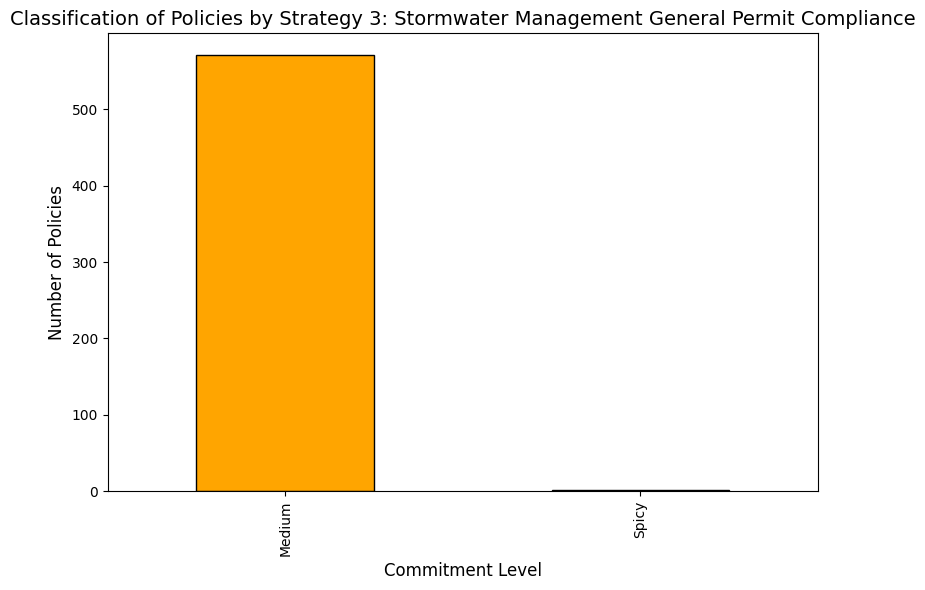

In [404]:
# Count the number of policies in each classification level
classification_counts = data['Assigned Level'].value_counts()

# Bar chart of classification levels
plt.figure(figsize=(8, 6))
classification_counts.plot(kind='bar', color=['orange', 'red'], edgecolor='black')
plt.xlabel('Commitment Level', fontsize=12)
plt.ylabel('Number of Policies', fontsize=12)
plt.title('Classification of Policies by Strategy 3: Stormwater Management General Permit Compliance', fontsize=14)
plt.tight_layout()
plt.show()

In [368]:
# Count the number of policies in each category
category_counts = data['Assigned Level'].value_counts()

# Display the counts
print("Number of Policies in Each Category:")
print(category_counts)

Number of Policies in Each Category:
Assigned Level
Medium    571
Spicy       2
Name: count, dtype: int64


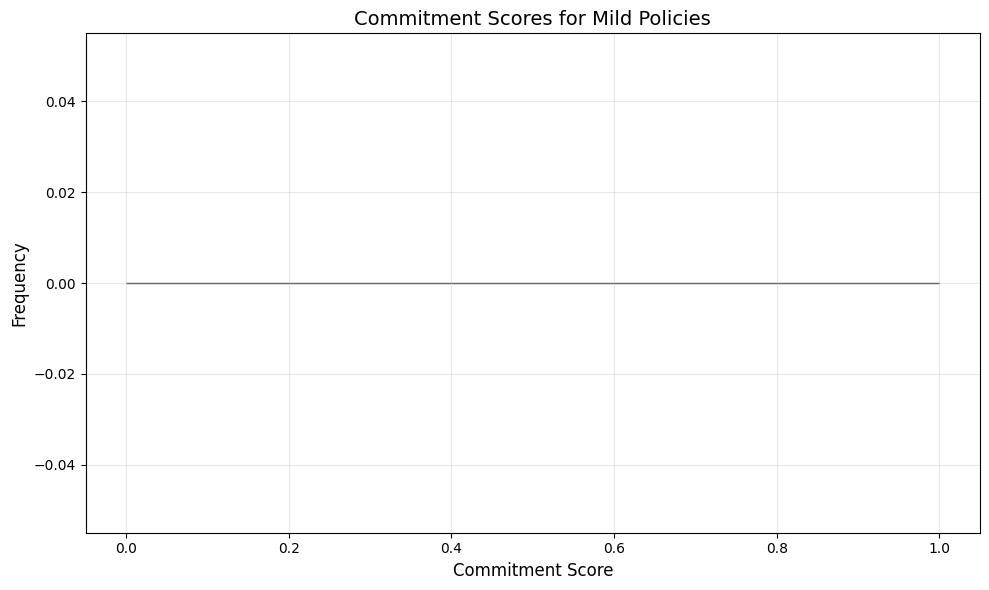

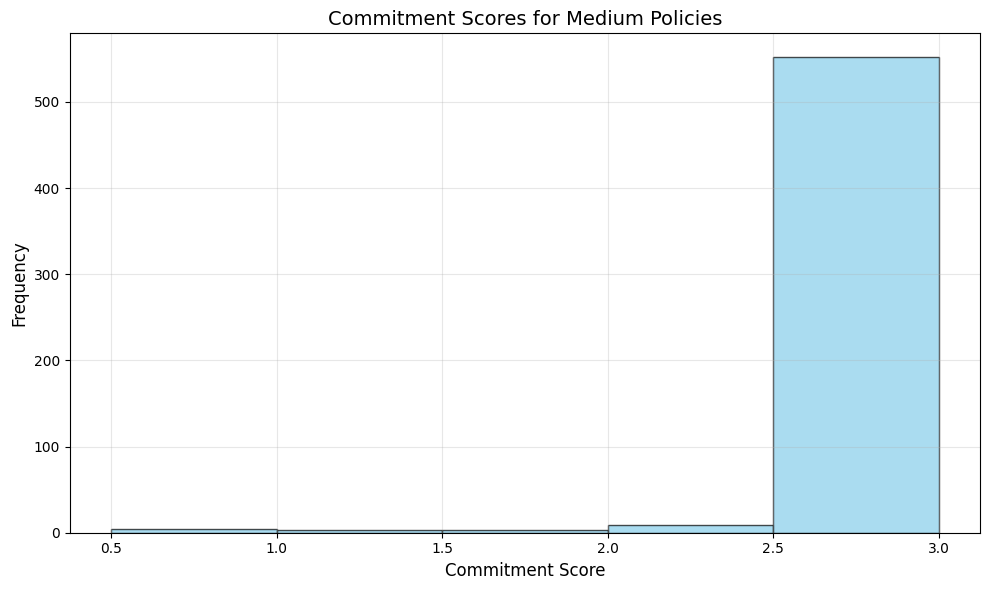

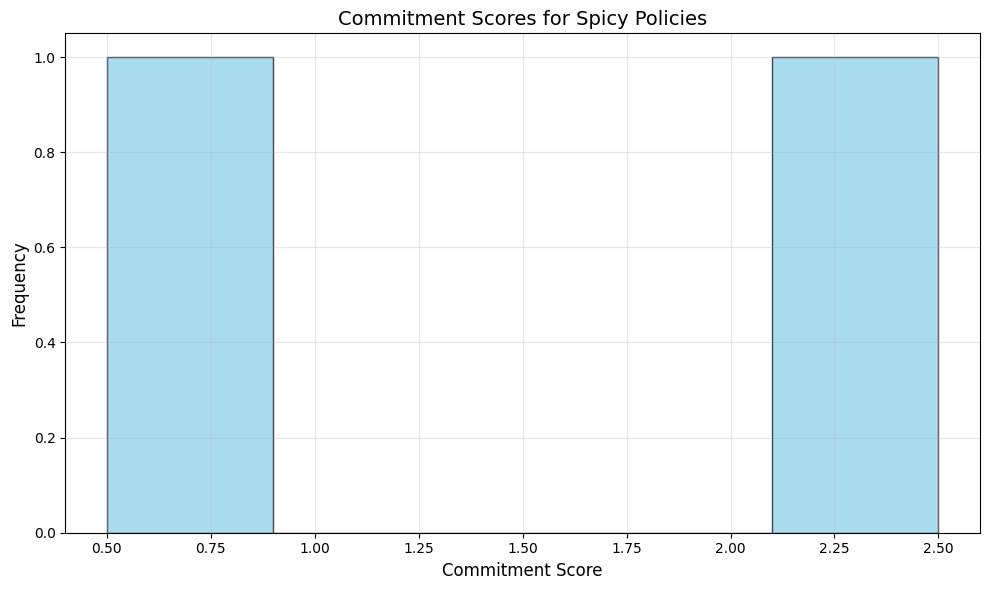

In [405]:
# Filter data for each commitment level
mild_policies = data[data['Assigned Level'] == 'Mild']
medium_policies = data[data['Assigned Level'] == 'Medium']
spicy_policies = data[data['Assigned Level'] == 'Spicy']


# Function to plot commitment scores for a given level
def plot_commitment_scores(policies, level):
    plt.figure(figsize=(10, 6))
    plt.hist(policies['School Board Policy Commitments Score (out of 3)'], bins=5, color='skyblue', edgecolor='black', alpha=0.7)
    plt.xlabel('Commitment Score', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.title(f'Commitment Scores for {level} Policies', fontsize=14)
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

# Plot for Mild policies
plot_commitment_scores(mild_policies, 'Mild')

# Plot for Medium policies
plot_commitment_scores(medium_policies, 'Medium')

# Plot for Spicy policies
plot_commitment_scores(spicy_policies, 'Spicy')

In [406]:
# Mild, medium, spicy for Strategy 4
# Text from the PDF 
mild_text = "The district's plan shall describe best management practices, measurable goals, and  timetables for implementation in the following areas: Public education and outreach on stormwater impacts Public participation, such as participation in adoption and implementation of the plan Illicit discharge detection and elimination, such as maps and programs to detect and  eliminate illicit non-storm water discharges Construction site stormwater runoff control, such as reviewing construction plans,  inspecting sites, and tracking construction site runoff, as well as erosion and sediment  control Post-construction stormwater management, such as developing design standards for  preventing runoff and verifying proper maintenance and operation of control  procedures  Pollution prevention and good housekeeping, such as evaluating waste disposal, material storage, and equipment-cleaning procedures and spill prevention, including  at bus maintenance facilities"
medium_text = "The district's plan shall develop best management practices, measurable goals, and  timetables for implementation in the following areas: Public education and outreach on stormwater impacts, stormwater reduction methods, and pollution reduction methods and importance Public participation, such as participation in adoption and implementation of the plan Illicit discharge detection and elimination, such as maps and programs to detect and eliminate illicit non-storm water discharges Construction site stormwater runoff control, such as reviewing construction plans, inspecting sites, and tracking and eliminating construction site runoff, as well as erosion and sediment control Post-construction stormwater management, such as developing and implementing design standards for preventing runoff and verifying proper maintenance and operation of control procedures  Pollution prevention and good housekeeping, such as evaluating waste disposal, material storage, equipment-cleaning procedures, pesticide use, and spill prevention, including at bus maintenance facilities"
spicy_text = "The district's plan shall develop best management practices, measurable goals, and  timetables for implementation in the following areas: Public education and outreach, including K-12 experiential learning and curricular resources, on stormwater impacts, stormwater reduction methods, and pollution reduction methods and importance, such as building rain gardens or not spraying pesticides when it is projected to rain. Public participation, including K-12 experiential learning and classroom participation and provide publicly-available data that tracks energy and water use, as well as other key measures, in a form that is accessible to students and the community. Illicit discharge detection and elimination, such as maps and programs to detect and eliminate illicit non-storm water discharges as well as significant fines and other deterrents to prevent illicit non-stormwater discharges. Construction site stormwater runoff control, such as reviewing construction plans for possible water runoff contamination hazards, inspecting sites for current or future water runoff contamination, and tracking and eliminating construction site runoff, as well as erosion and sediment control Post-construction stormwater management, such as developing and implementing design standards for  preventing runoff and verifying proper maintenance and operation of control procedures  Pollution prevention and good housekeeping, such as evaluating waste disposal, material storage, equipment-cleaning procedures, pesticide use, and spill prevention, including at bus maintenance facilities"


commitment_texts = {
    'Mild': mild_text,
    'Medium': medium_text,
    'Spicy': spicy_text
}


# Define function 
def classify_policy(policy_text, commitment_texts):
    if not isinstance(policy_text, str) or not policy_text.strip():
        return None 
    
    # Combine the commitment texts and the policy text
    texts = list(commitment_texts.values()) + [policy_text]
    
    # Compute TF-IDF and cosine similarity
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(texts)
    similarities = cosine_similarity(tfidf_matrix[-1:], tfidf_matrix[:-1]).flatten()
    
    # Return the category with the highest similarity
    best_match = max(zip(commitment_texts.keys(), similarities), key=lambda x: x[1])
    return best_match

# Apply classification to each policy
data['Classification'] = data['BP3511: PDF Text'].apply(lambda x: classify_policy(x, commitment_texts))
# Split classification results into separate columns
data[['Assigned Level', 'Similarity Score']] = data['Classification'].apply(
    lambda x: pd.Series(x) if x else pd.Series([None, None])
)

# Display classification results
data[['District Name', 'BP3511: PDF Text', 'Assigned Level', 'Similarity Score']]

,District Name,BP3511: PDF Text,Assigned Level,Similarity Score
293,Tustin Unified,book policy manual section 3000 business servi...,Mild,0.031629
51,Clovis Unified,board policy 3511 clovis unified school distri...,Spicy,0.098317
259,Salinas Union High,salina union high school district business pol...,Spicy,0.077218
338,Hollister,bp 3511 board policy business noninstructional...,Spicy,0.076049
291,Santa Ana Unified,santa ana unified school district board policy...,Spicy,0.061073
...,...,...,...,...
430,Pacifica,policy 3511 energy water management status ado...,Spicy,0.074551
400,San Marcos Unified,policy 3511 energy water management status ado...,Spicy,0.074461
333,Sacramento City Unified,policy 3511 energy water management status ado...,Spicy,0.053740
83,McKinleyville Union Elementary,policy 3511 energy water management status ado...,Spicy,0.074318


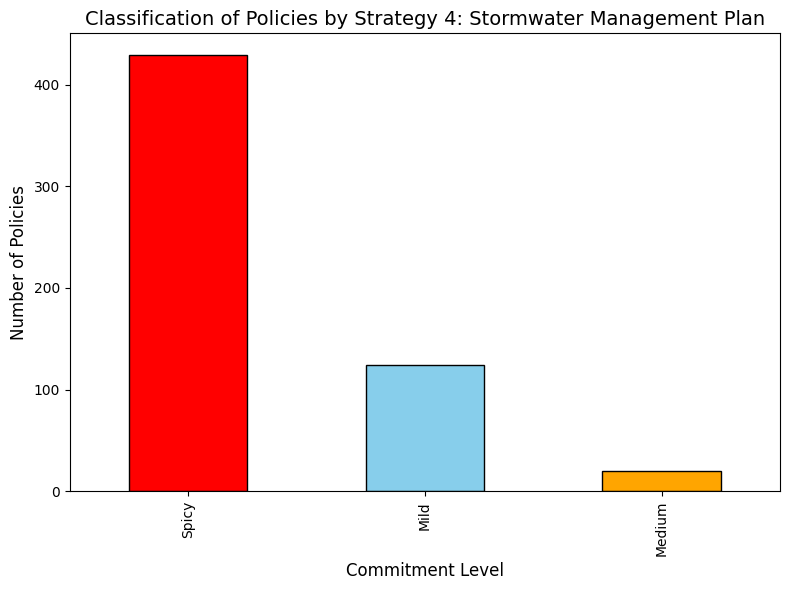

In [407]:
# Count number of policies in each classification level
classification_counts = data['Assigned Level'].value_counts()

# Bar chart of classification levels
plt.figure(figsize=(8, 6))
classification_counts.plot(kind='bar', color=['red', 'skyblue', 'orange'], edgecolor='black')
plt.xlabel('Commitment Level', fontsize=12)
plt.ylabel('Number of Policies', fontsize=12)
plt.title('Classification of Policies by Strategy 4: Stormwater Management Plan', fontsize=14)
plt.tight_layout()
plt.show()

In [372]:
# Count number of policies in each category
category_counts = data['Assigned Level'].value_counts()

# Display the counts
print("Number of Policies in Each Category:")
print(category_counts)

Number of Policies in Each Category:
Assigned Level
Spicy     429
Mild      124
Medium     20
Name: count, dtype: int64


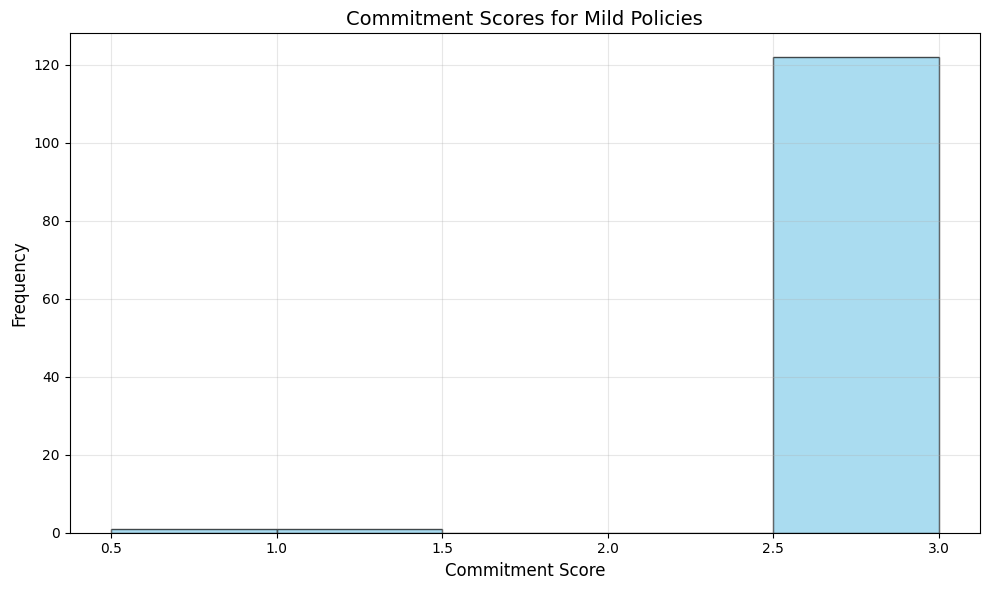

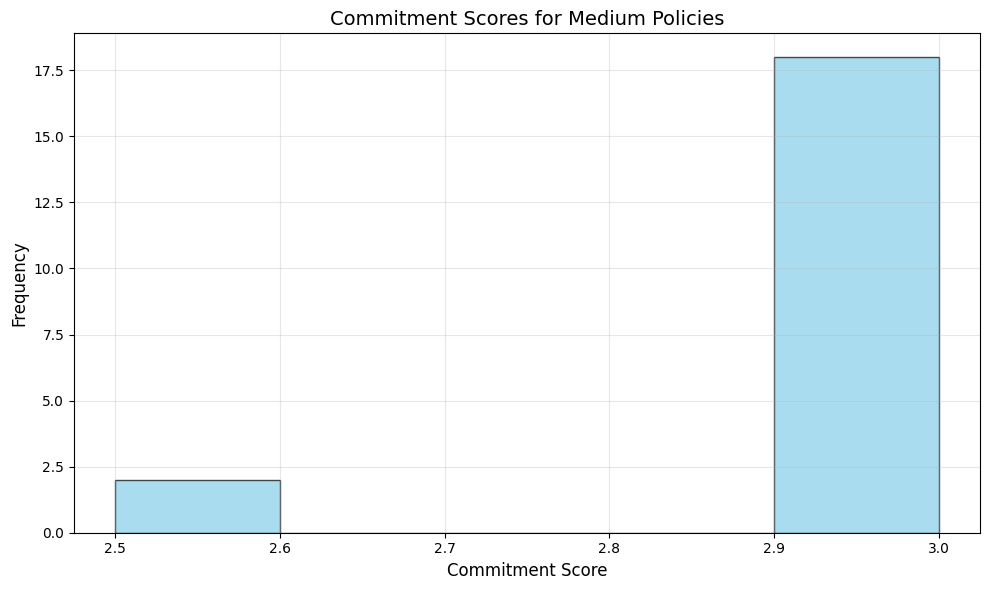

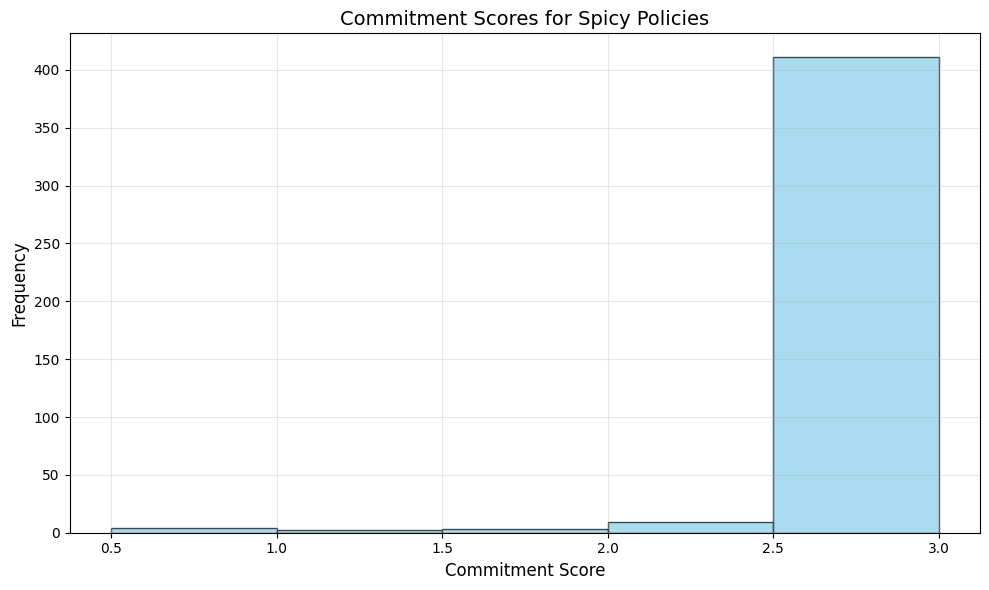

In [373]:
# Filter data for each commitment level
mild_policies = data[data['Assigned Level'] == 'Mild']
medium_policies = data[data['Assigned Level'] == 'Medium']
spicy_policies = data[data['Assigned Level'] == 'Spicy']

# Function to plot commitment scores for a given level
def plot_commitment_scores(policies, level):
    plt.figure(figsize=(10, 6))
    plt.hist(policies['School Board Policy Commitments Score (out of 3)'], bins=5, color='skyblue', edgecolor='black', alpha=0.7)
    plt.xlabel('Commitment Score', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.title(f'Commitment Scores for {level} Policies', fontsize=14)
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

# Plot for Mild policies
plot_commitment_scores(mild_policies, 'Mild')

# Plot for Medium policies
plot_commitment_scores(medium_policies, 'Medium')

# Plot for Spicy policies
plot_commitment_scores(spicy_policies, 'Spicy')